# Análisis operativo de Airbnb en Seattle

<img src="airbnb-logo.png" alt="airbnb" style="float:left;" width="440"/>
<img src="ucm-logo.png" alt="ucm" style="right;" width="300"/>

__Universidad Complutense de Madrid__

__Facultad de Informática__

__Minería de datos y el paradigma Big Data__

__Autores: Alberto Pastor Moreno, Iván Fernández Mena y Francisco Javier Melchor González__

## Introducción

El presente documento introduce al lector a la descripción y explicación del desarrollo realizado por un grupo de tres alumnos de la asignatura Minería de datos y el paradigma Big Data de la Facultad de Informática de la Universidad Complutense de Madrid de una solución analítica. El proyecto análisis operativo de Airbnb, bajo el paradigma open data que se razonará en siguientes apartados, busca resolver una hipótesis propuesta por el grupo de estudiantes basada en el compartimiento correlativo de los datos de Airbnb en Seattle con la localización de espacios culturales en Seattle. El enfoque que utilizó el equipo para resolver la problemática del proyecto se basa en los fundamentos de la minería de datos, tomando las técnicas y metodologías de este marco para contextualizar la implementación realizada. El ejercicio que se expone en los siguientes apartados comprende las restricciones y exigencias de la asignatura, pudiendo deberse alguna decisión en el desarrollo del proyecto a estos motivos.


## Objetivos

El principal objetivo del proyecto se enfoca en la resolución de la siguiente cuestión: dado un perfil host de Airbnb, un apartamento perteneciente a éste en Seattle, el mapa de espacios culturales tematizados en esta ciudad y un mes (Abril o Septiembre, por ejemplo), ¿qué número de días será reservado el apartamento a lo largo del mes especificado?

La solución a la cuestión planteada, concentrada en el análisis predictivo, hace uso de técnicas de cruce de varios conjuntos de datos. Los conjuntos de datos abiertos utilizados a lo largo del proceso que hemos creído relevantes y nutritivos para el objetivo del proyecto se pueden encontrar a continuación:

- El listado de hosts de Airbnb de Seattle, calendario de reservas de estos hosts y las consecuentes reviews han sido extraídos de [Kaggle](https://www.kaggle.com/airbnb/seattle)
- El listado de espacios culturales de Seattle ha sido extraído del [portal de datos abiertos de esta ciudad](https://data.seattle.gov/Community/Seattle-Cultural-Space-Inventory/hrat-v8cm)

Para alcanzar el objetivo propuesto y poder resolver la cuestión planteada, enmarcamos en las metas del proyecto la construcción de un modelo de aprendizaje automático que tome como fuente de datos de entrada los datos especificados anteriormente para devolver como salida una respuesta a la pregunta planteada al inicio de este apartado. Consideraríamos un desarrollo analítico exitoso alcanzar un porcentaje de aciertos superior al 90% de los datos de entrada al modelo final con la configuración óptima encontrada. Dado este porcentaje consideraremos que hemos encontrado las características de los conjuntos de datos que más valor aportan a nuestra cuestión, objetivo implícito en el desarrollo de la asignatura.


## Metodología y planificación

### Introducción

Las técnicas de Data Science o Data Analytics surgieron en la década de los 90, cuando se usaba el término KDD (Knowledge Discovery in Databases) para referirse al concepto de hallar conocimiento en los datos. En un intento de normalización de este proceso de descubrimiento de conocimiento, de forma similar a como se hace en Ingeniería del Software para normalizar el proceso de desarrollo software, surgieron a finales de los 90 dos metodologías principales: CRISP-DM (Cross Industry Standard Process for Data Mining) y SEMMA (Sample, Explore, Modify, Model, and Assess). Ambas especifican las tareas a realizar en cada fase descrita por el proceso, asignando tareas concretas y definiendo lo que es deseable obtener tras cada fase.

### Elección

Se puede establecer un paralelismo claro entre CRIPS-DM y SEMMA, pero CRISP-DM es más completo porque tiene en cuenta la aplicación al entorno de negocio de los resultados, y por ello es la que se adoptó popularmente (en encuestas realizadas en KDNuggets en 2002, 2004, 2007 y 2014 se comprobó que CRISP-DM era la principal metodología utilizada, 4 veces más que SEMMA)


Usaremos un CRIPS-DM modificado para que se aplique a un proyecto más pequeño asociado al ámbito de la asignatura, siempre basándonos en el estándar establecido y en este ámbito no se tendrá tanto en cuenta la realización de todas las tareas más específicas que dicta una fase, ni el orden establecido por CRIPS-DM para hacerlas. Está decisiones las tomará el equipo según las acciones que necesiten dentro de cada fase.


### Descripción CRISP-DM

**CRISP-DM (Cross Industry Standard Process for Data Mining)** proporciona una descripción normalizada del ciclo de vida de un proyecto estándar de análisis de datos. El modelo CRISP-DM cubre las fases de un proyecto, sus tareas respectivas, y las relaciones entre estas tareas.
El ciclo de vida del proyecto de minería de datos consiste en seis fases mostradas en la figura siguiente.

<img src="loop.png" alt="" width="800"/>

La secuencia de las fases no es rígida: se permite movimiento hacia adelante y hacia atrás entre diferentes fases. El resultado de cada fase determina qué fase, o qué tarea particular de una fase, hay que hacer después. Las flechas indican las dependencias más importantes y frecuentes.

El círculo externo en la figura simboliza la naturaleza cíclica de los proyectos de análisis de datos. El proyecto no se termina una vez que la solución se despliega. La información descubierta durante el proceso y la solución desplegada pueden producir nuevas iteraciones del modelo. Los procesos de análisis subsecuentes se beneficiarán de las experiencias previas.

A continuación vamos a describir brevemente cada una de las fases.

#### Fase I. Business Understanding. Definición de necesidades del cliente. Comprensión del negocio

Esta fase inicial se enfoca en la comprensión de los objetivos de proyecto. Después se convierte este conocimiento de los datos en la definición de un problema de minería de datos y en un plan preliminar diseñado para alcanzar los objetivos.

<img src="fase1.png" alt="" width="800"/>

#### Fase II. Data Understanding. Estudio y comprensión de los datos


La fase de entendimiento de datos comienza con la colección de datos inicial y continúa con las actividades que permiten familiarizarse con los datos, identificar los problemas de calidad, descubrir conocimiento preliminar sobre los datos, y/o descubrir subconjuntos interesantes para formar hipótesis en cuanto a la información oculta.

<img src="fase2.png" alt="" width="800"/>

#### Fase III. Data Preparation. Análisis de los datos y selección de características

La fase de preparación de datos cubre todas las actividades necesarias para construir el conjunto final de datos (los datos que se utilizarán en las herramientas de modelado) a partir de los datos en bruto iniciales. Las tareas incluyen la selección de tablas, registros y atributos, así como la transformación y la limpieza de datos para las herramientas que modelan.

<img src="fase3.png" alt="" width="800"/>

#### Fase IV. Modeling. Modelado

En esta fase, se seleccionan y aplican las técnicas de modelado que sean pertinentes al problema y se calibran sus parámetros a valores óptimos. Típicamente hay varias técnicas para el mismo tipo de problema de minería de datos. Algunas técnicas tienen requerimientos específicos sobre la forma de los datos. Por lo tanto, casi siempre en cualquier proyecto se acaba volviendo a la fase de preparación de datos.


<img src="fase4.png" alt="" width="800"/>

#### Fase V. Evaluation. Evaluación. Obtención de resultados

En esta etapa en el proyecto, se han construido uno o varios modelos que parecen alcanzar calidad suficiente desde la una perspectiva de análisis de datos.
Antes de proceder al despliegue final del modelo, es importante evaluar a fondo y revisar los pasos ejecutados para crearlo, comparar el modelo obtenido con los objetivos de negocio. Un objetivo clave es determinar si hay alguna cuestión importante de negocio que no haya sido considerada suficientemente. Al final de esta fase, se debería obtener una decisión sobre la aplicación de los resultados del proceso de análisis de datos.

<img src="fase5.png" alt="" width="800"/>

#### Fase VI. Deployment. Despliegue. Puesta en producción

Generalmente, la creación del modelo no es el final del proyecto. Incluso si el objetivo del modelo es de aumentar el conocimiento de los datos, el conocimiento obtenido tendrá que organizarse y presentarse para que el cliente pueda usarlo. Dependiendo de los requisitos, la fase de desarrollo puede ser tan simple como la generación de un informe o tan compleja como la realización periódica y quizás automatizada de un proceso de análisis de datos en la organización.

<img src="fase6.png" alt="" width="800"/>

Finalmente se realiza un informe final. Es la conclusión del proyecto de DM realizado. Dependiendo del plan de implementación, este informe puede ser sólo un resumen de los puntos importantes del proyecto y la experiencia lograda o puede ser una presentación final que incluya y explique los resultados logrados con el proyecto. 

## Fase I. Business Understanding. Definición de necesidades del cliente. Comprensión del negocio.

### Objetivos del negocio

Tal y como hemos explicado en el apartado _Objetivos_ de esta práctica, el principal objetivo del proyecto se enfoca en la resolución de la siguiente cuestión: dado un perfil host de Airbnb, un apartamento perteneciente a éste en Seattle y el mapa de espacios culturales tematizados en esta ciudad, ¿qué precio por noche aconseja nuestro sistema?

### Valoración de la situación

Este análisis utiliza datos sobre [la actividad de Airbnb en Seattle](https://www.kaggle.com/airbnb/seattle) y [espacios culturales en Seattle](https://data.seattle.gov/Community/Seattle-Cultural-Space-Inventory/hrat-v8cm)

### Objetivos de Data Mining

### Plan de proyecto

## Fase II. Data Understanding. Estudio y comprensión de los datos

Antes de comenzar la codificación de nuestro proyecto, cargamos todos los paquetes necesarios para ello en las siguientes líneas de código.

Los paquetes que cargaremos son los siguientes:

- psych
- tidyverse
- corrplot
- dplyr
- lattice
- ggplot2
- GGally
- mltools
- data.table
- onehot
- caTools

In [1]:
if(!require(psych)){
    install.packages("psych")
    library(psych)
}
if(!require(tidyverse)){
    install.packages("tidyverse")
    library(tidyverse)
}

if(!require(corrplot)){
    install.packages("corrplot")
   library(corrplot)
}

if(!require(dplyr)){
    install.packages("dplyr")
    library(dplyr)
}
if(!require(lattice)){
    install.packages("lattice")
    library(lattice) 
}
if(!require(ggplot2)){
    install.packages("ggplot2")
    library(ggplot2) 
}
if(!require(GGally)){
    install.packages("GGally")
    library(GGally)
}
if(!require(mltools)){
    install.packages("mltools")
    library(mtools)
}
if(!require(data.table)){
    intall.packages("data.table")
    library(data.table)
}
if(!require(onehot)){
    install.packages("onehot")
    library(onehot)
}
if(!require(caTools)){
    install.packages("caTools")
    library(caTools)
}
if(!require(geosphere)){
    install.packages("geosphere")
    library(geosphere)
}
devtools::install_github('rstudio/DT')

Loading required package: psych
Loading required package: tidyverse
── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 2.2.1     ✔ purrr   0.2.4
✔ tibble  1.4.1     ✔ dplyr   0.7.4
✔ tidyr   0.7.2     ✔ stringr 1.4.0
✔ readr   1.1.1     ✔ forcats 0.2.0
Warning message:
“package ‘stringr’ was built under R version 3.4.4”── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ ggplot2::%+%()   masks psych::%+%()
✖ ggplot2::alpha() masks psych::alpha()
✖ dplyr::filter()  masks stats::filter()
✖ dplyr::lag()     masks stats::lag()
Loading required package: corrplot
corrplot 0.84 loaded
Loading required package: lattice
Loading required package: GGally

Attaching package: ‘GGally’

The following object is masked from ‘package:dplyr’:

    nasa

Loading required package: mltools

Attaching package: ‘mltools’

The following object is masked from ‘package:tidyr’:

    replace_na

Loading required package: data.table
Warning mess

crosstalk (NA -> 1.0.0) [CRAN]
httpuv    (NA -> 1.3.5) [CRAN]
shiny     (NA -> 1.0.5) [CRAN]


Skipping 1 packages not available: promises
Skipping 18 packages ahead of CRAN: cli, colorspace, digest, htmlwidgets, jsonlite, mime, munsell, pillar, R6, Rcpp, rlang, sourcetools, stringi, stringr, utf8, viridisLite, xtable, yaml
Installing 4 packages: crosstalk, httpuv, promises, shiny
Installing packages into ‘/home/albertopastormr/R/x86_64-pc-linux-gnu-library/3.4’
(as ‘lib’ is unspecified)


ERROR: Error: (converted from warning) package ‘promises’ is not available (for R version 3.4.3)


La características del sistema, el sistema operativo y la versión de R utilizada en este análisis se muestra a continuación.

### Recolectar los datos iniciales

La solución a la cuestión planteada, concentrada en el análisis predictivo, hace uso de técnicas de cruce de varios conjuntos de datos. Los conjuntos de datos abiertos utilizados a lo largo del proceso que hemos creído relevantes y nutritivos para el objetivo del proyecto se pueden encontrar a continuación: 

Los datos a utilizar en este proyecto y sus fuentes son los siguientes:
- Listado de _hosts_ de Airbnb de Seattle, calendario de reservas de estos _hosts_ y las consecuentes _reviews_ de estos hosts, extraídos de [Kaggle](https://www.kaggle.com/airbnb/seattle)
- Listado de espacios culturales de Seattle, extraídos ha sido extraído del [portal de datos abiertos de esta ciudad](https://data.seattle.gov/Community/Seattle-Cultural-Space-Inventory/hrat-v8cm)

En los siguientes apartados analizaremos meticulosamente los datos del proyecto con el objetivo de realizar una comprensión exhausta de los datos elegidos para resolver la cuestión de este proyecto.

Cargamos todos los datos contenidos en formato `.csv` descargados en local previamente.

In [5]:
airbnb_listings_filename <- "datasets//listings.csv"
airbnb_calendar_filename <- "datasets//calendar.csv"
airbnb_reviews_filename <- "datasets//reviews.csv"
cultural_spaces_filename <- "datasets//cultural_spaces.csv"

In [6]:
airbnb_listings <- read.csv(file=airbnb_listings_filename, header=TRUE, sep=",", na.strings=c(""," ","NA"))
airbnb_calendar <- read.csv(file=airbnb_calendar_filename, header=TRUE, sep=",", na.strings=c(""," ","NA"))
airbnb_reviews <- read.csv(file=airbnb_reviews_filename, header=TRUE, sep=",", na.strings=c(""," ","NA"))
cultural_spaces <- read.csv(file=cultural_spaces_filename, header=TRUE, sep=",", na.strings=c(""," ","NA"))

### Descripción de los datos 

Para profundizar en la composición de los conjuntos de datos a tratar en este proyecto, analizaremos los atributos de cada uno de los conjuntos de datos cargados a continuación

#### Casas de Airbnb en Seattle

Primero, analizaremos el conjunto de datos `airbnb_listings`, el cual expone por cada fila la información completa que procesa de un _listing_ perteneciente a un _host_ de Seattle Airbnb, siendo esta la siguiente:
-  `	Id: ` Identificador del Airbnb
-  `	Listing_url: ` Página del Airbnb, dónde podemos encontrar fotos, fechas, comentarios, contactos con el propietario/a etc.
-  `	Scrape_id: ` Identificador de reserva
-  `	Last_scraped: ` Última reserva
-  `	Name: ` Nombre del Airbnb
-  `	Summary: ` Breve resumen del Airbnb en concreto que contiene características del mismo, actividades que pueden realizarse dependiendo de la situación del mismo, número de personas recomendado, localización, fecha en la que fue construido etc.
-  `	Space: ` Descripción del espacio del Airbnb, en algunas ocasiones viene el mismo contenido que en el atributo “Summary”, pero suelen incluir más detalles, así como características del paisaje que rodea el Airbnb, si hay o no restaurante o tiendas cercanos, si es tranquila o muy transitado el lugar donde se sitúa el Airbnb.
-  `	Description: ` Descripción detallada del Airbnb, que suele ser muy parecida o igual que el atributo “Summary” del mismo.
-  `	Experiences offered: ` Experiencias que ofrece el Airbnb, en todos aparece “nada”
-  `	Neighborhood_overview: ` Descripción o vision general del barrio donde se encuentra el Airbnb en concreto
-  `	Notes: ` Notas sobre el Airbnb en concreto, normalmente suelen incluir detalles que llamen la atención a los clientes para convencerlos de que lo alquilen o aparecen mensajes que indican que se pongan en contacto con el comprador si el cliente tiene alguna duda.
-  `	Transit: ` Este atributo indica, las diversas opciones de transporte público disponibles, que sean accesibles y que estén cerca del Airbnb.
-  `	Thumbnail_url: ` URL que nos lleva a una foto en miniatura del Airbnb
-  `	Medium_url: ` URL que nos lleva a la misma foto que el atributo anterior, pero un poco más grande
-  `	Picture_url: ` URL que nos lleva a la misma foto que los dos atributos anteriores, pero con un tamaño estándar
-  `	Xl_picture_url: ` URL con la misma foto que los 3 atributos anteriores, pero en tamaño grande.
-  `	Host_url: ` URL que conduce a una página donde aparece una descripción del usuario que alquila el Airbn, así como los anuncios que tiene, idiomas en los que habla, lugar donde vive, las guías de dicho usuario (si las tiene), comentarios, valoraciones, si ha confirmado número de teléfono, correo electrónico, correo electrónico de empresa y si tiene documentación oficial de identificación, nivel de usuario, cantidad de valoraciones que le han hecho los diferentes clientes, foto etc.
-  `	Host_name: ` Nombre del usuario que alquila el Airbnb
-  `	Host_since: ` Fecha desde la cual lleva registrada el usuario que alquila el Airbnb
-  `	Host_location: ` Lugar dónde vive el usuario
-  `	Host_about: ` Breve descripción sobre el usuario
-  `	Host_response_time: ` Disponibilidad del usuario para responder llamadas, correos o mensajes.
-  `	Host_response_rate: ` Porcentaje de respuesta del usuario
-  `	Host_acceptance_reate: ` Porcentaje de aceptación del usuario
-  `	Host_is_superhost: ` Indica ‘t’ si el usuario es superusuario o premium y ‘f’ si no lo es.
-  `	host_thumbnail_url: ` URL de una foto en miniatura que representa al usuario propietario
-  `	host_picture_url: ` URL de una foto en tamaño normal que representa al usuario propietario.
-  `	host_neighbourhood: ` Barrio del usuario propietario
-  `	host_listings_count: ` *
-  `	host_total_listings_count: ` *
-  `	host_verifications: ` Lista de verificaciones del usuario propietario, así como móvil, email, valoraciones, linkedin, Facebook 
-  `	host_has_profile_pic
-  `	host_identity_verified: ` Indica si la identidad del usuario está verificada, entendiendo ‘t’ como verificada y ‘f’ como no verificada.
-  `	Street: ` Dirección del Airbnb 
-  `	Neighbourhood: ` Barrio donde está situado el Airbnb
-  `	neighbourhood_cleansed: ` Zona concreta del barrio donde está situado el Airbnb
-  `	neighbourhood_group_cleansed: ` Recoge la misma información que el atributo “Neighbourhood”
-  `	city: ` Ciudad donde se encuentra el Airbnb
-  `	state: ` Estado donde se encuentra el Airbnb
-  `	zipcode: ` Código postal del Airbnb
-  `	market: ` *
-  `	smart_location: ` Nombre de la ciudad y estado
-  `	country_code: ` Abreviatura del país del Airbnb
-  `	country: ` País del airbnb
-  `	latitude: ` Latitud en la que se encuentra el Airbnb
-  `	longitude: ` Longitud en la que se encuentra el Airbnb
-  `	is_location_exact: ` Indica si es la localización exacta del Airbnb
-  `	property_type: ` Tipo de Airbnb, puede ser, piso, apartamento, chalé etc.
-  `	room_type: ` Tipo de alquiler, esto quiere decir si el alquiler es por habitaciones o de todo el espacio que ofrece el tipo de Airbnb que sea.
-  `	Accommodates: ` Habitaciones
-  `	Bathrooms: ` Cuartos de baño del Airbnb
-  `	Bedrooms: ` Habitaciones del Airbnb
-  `	Beds: ` Camas del Airbnb
-  `	bed_type: ` Tipos de camas que ofrece el Airbnb
-  `	amenities: ` Electrodomésticos que ofrece el Airbnb 
-  `	square_feet: ` metros cuadrados, suele aparecer vacía en la mayoría
-  `	Price: ` Precio por noche del Airbnb
-  `	weekly_price: ` Precio por semana del Airbnb
-  `	monthly_price: ` Precio por mes del Airbnb
-  `	security_deposit: ` Fianza para guardar la reserva
-  `	cleaning_fee: ` Precio de servicio de limpieza
-  `	guests_included: ` Invitados que permite traer al Airbnb
-  `	extra_people: ` Precio por persona extra al Airbnb
-  `	minimum_nights: ` Mínimo de noches que se deben reservar para una estancia.
-  `	maximum_nights: ` Máximo de noches que se pueden reservar.
-  `	calendar_updated: ` Última modificación del calendario
-  `	has_availability: ` Indica si está disponible para alquilar el Airbnb 
-  `	availability_30: ` Disponibilidad del Airbnb en un mes 
-  `	availability_60: ` Disponibilidad del Airbnb en dos meses 
-  `	availability_90: ` Disponibilidad del Airbnb en 3 meses 
-  `	availability_365: ` Disponibilidad del Airbnb en 1 año 
-  `	calendar_last_scraped: ` Fecha de la última reserva del Airbnb
-  `	number_of_reviews: ` Número de valoraciones que posee el Airbnb
-  `	first_review: ` Fecha de la primera valoración del Airbnb
-  `	last_review: ` Fecha de la última valoración del Airbnb
-  `	review_scores_rating: ` Media de puntuaciones en general del Airbnb
-  `	review_scores_accuracy: ` Media de puntuaciones en las reseñas con respecto a la medida en la que la página del anuncio coincide con el alojamiento
-  `	review_scores_cleanliness: ` Media de puntuaciones en las reseñas con respecto a la limpieza del Airbnb.
-  `	review_scores_checkin: ` Media de puntuación con respecto al trato al trato recibido con respecto a la llegada.
-  `	review_scores_communication: ` Media de puntuaciones en las reseñas con respecto a la medida en la que se ha tenido comunicación antes y después de la estancia con el usuario propietario.
-  `	review_scores_location: ` Media de puntuaciones en las reseñas con respecto a los huéspedes del barrio
-  `	review_scores_value: ` Media de puntuaciones en las reseñas con respecto a calidad-precio del Airbnb
-  `	requires_license: ` Indica si el Airbnb necesita licencia indicando ‘t’ en caso de que la necesite y ‘f’ en caso de que no la necesite
-  `	license: ` Este atributo indica el tipo de licencia necesaria en el caso de que lo sea, si no es necesaria, aparecerá vacía
-  `	jurisdiction_names: ` Nombre la jurisdicción aplicada al Airbnb, todos tienen la jurisdicción Whasington State Legislature
-  `	instant_bookable: ` Este atributo muestra ‘t’ en caso de que el Airbnb cuente con reserva instantánea y ‘f’ en caso contrario
-  `	cancellation_policy: ` Indica el tipo de política de cancelación
-  `	require_guest_profile_picture: ` Indica una ‘t’ si se requiere que el cliente tenga que tener una foto de perfil para realizar la reserva y ‘f’ en caso contrario
-  `	require_guest_phone_verification: ` Indica una ‘t’ si se requiere que el cliente tenga que tener verificado el número de teléfono y ‘f’ en caso contrario
-  `	calculated_host_listings_count: ` Este atributo muestra otra métrica para medir la experiencia del usuario (hay que revisarlo)
-  `	reviews_per_month: ` Número de valoraciones por semana, que tiene el Airbnb


In [7]:
names(airbnb_listings)

[1] "id"                               "listing_url"                     
 [3] "scrape_id"                        "last_scraped"                    
 [5] "name"                             "summary"                         
 [7] "space"                            "description"                     
 [9] "experiences_offered"              "neighborhood_overview"           
[11] "notes"                            "transit"                         
[13] "thumbnail_url"                    "medium_url"                      
[15] "picture_url"                      "xl_picture_url"                  
[17] "host_id"                          "host_url"                        
[19] "host_name"                        "host_since"                      
[21] "host_location"                    "host_about"                      
[23] "host_response_time"               "host_response_rate"              
[25] "host_acceptance_rate"             "host_is_superhost"               
[27] "host_thumbnail_url"               "host_picture_url"                
[29] "host_neighbourhood"               "host_listings_count"             
[31] "host_total_listings_count"        "host_verifications"              
[33] "host_has_profile_pic"             "host_identity_verified"          
[35] "street"                           "neighbourhood"                   
[37] "neighbourhood_cleansed"           "neighbourhood_group_cleansed"    
[39] "city"                             "state"                           
[41] "zipcode"                          "market"                          
[43] "smart_location"                   "country_code"                    
[45] "country"                          "latitude"                        
[47] "longitude"                        "is_location_exact"               
[49] "property_type"                    "room_type"                       
[51] "accommodates"                     "bathrooms"                       
[53] "bedrooms"                         "beds"                            
[55] "bed_type"                         "amenities"                       
[57] "square_feet"                      "price"                           
[59] "weekly_price"                     "monthly_price"                   
[61] "security_deposit"                 "cleaning_fee"                    
[63] "guests_included"                  "extra_people"                    
[65] "minimum_nights"                   "maximum_nights"                  
[67] "calendar_updated"                 "has_availability"                
[69] "availability_30"                  "availability_60"                 
[71] "availability_90"                  "availability_365"                
[73] "calendar_last_scraped"            "number_of_reviews"               
[75] "first_review"                     "last_review"                     
[77] "review_scores_rating"             "review_scores_accuracy"          
[79] "review_scores_cleanliness"        "review_scores_checkin"           
[81] "review_scores_communication"      "review_scores_location"          
[83] "review_scores_value"              "requires_license"                
[85] "license"                          "jurisdiction_names"              
[87] "instant_bookable"                 "cancellation_policy"             
[89] "require_guest_profile_picture"    "require_guest_phone_verification"
[91] "calculated_host_listings_count"   "reviews_per_month"

In [8]:
dim(airbnb_listings)

[1] 3818   92

Como podemos ver, el dataset tiene 92 atributos y 3818 filas. A continuación, vemos un ejemplo de una fila del dataset para obtener un primer vistazo sobre cómo se comportan los atributos.

In [9]:
airbnb_listings[1,]

id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,⋯,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
241032,https://www.airbnb.com/rooms/241032,2.01601e+13,2016-01-04,Stylish Queen Anne Apartment,NA,"Make your self at home in this charming one-bedroom apartment, centrally-located on the west side of Queen Anne hill. This elegantly-decorated, completely private apartment (bottom unit of a duplex) has an open floor plan, bamboo floors, a fully equipped kitchen, a TV, DVD player, basic cable, and a very cozy bedroom with a queen-size bed. The unit sleeps up to four (two in the bedroom and two on the very comfortable fold out couch, linens included) and includes free WiFi and laundry. The apartment opens onto a private deck, complete with it's own BBQ, overlooking a garden and a forest of black bamboo. The Apartment is perfectly-located just one block from the bus lines where you can catch a bus and be downtown Seattle in fifteen minutes or historic Ballard in ten or a quick five-minute walk will bring you to Whole Foods and Peet's Coffee or take a fifteen minute walk to the top of Queen Anne Hill where you will find a variety of eclectic shops, bars, and restaurants. There is no","Make your self at home in this charming one-bedroom apartment, centrally-located on the west side of Queen Anne hill. This elegantly-decorated, completely private apartment (bottom unit of a duplex) has an open floor plan, bamboo floors, a fully equipped kitchen, a TV, DVD player, basic cable, and a very cozy bedroom with a queen-size bed. The unit sleeps up to four (two in the bedroom and two on the very comfortable fold out couch, linens included) and includes free WiFi and laundry. The apartment opens onto a private deck, complete with it's own BBQ, overlooking a garden and a forest of black bamboo. The Apartment is perfectly-located just one block from the bus lines where you can catch a bus and be downtown Seattle in fifteen minutes or historic Ballard in ten or a quick five-minute walk will bring you to Whole Foods and Peet's Coffee or take a fifteen minute walk to the top of Queen Anne Hill where you will find a variety of eclectic shops, bars, and restaurants. There is no",none,NA,⋯,10,f,NA,WASHINGTON,f,moderate,f,f,2,4.07


#### Calendario de reservas de Airbnb en Seattle

A continuación, haremos el mismo proceso con el conjunto de datos `airbnb_calendar`, el cual almacena información sobre todas las reservas realizadas en Airbnb sobre _hosts_ de Seattle.

In [10]:
names(airbnb_calendar)

[1] "listing_id" "date"       "available"  "price"

In [11]:
dim(airbnb_calendar)

[1] 1393570       4

Este dataset considera 1393570 filas con 4 atributos cada una de ellas con la siguiente interpretación:
- `listing_id`: id en el sistema de Airbnb del _listing_ al cual se corresponde la reserva.
- `date`: día, mes y año.
- `available`: disponibilidad del _listing_ en esta fecha.
- `price`: precio con el cual se oferta el _listing_ en esta fecha.

#### Reviews de Airbnb en Seattle

Realizamos el mismo proceso con el conjunto de datos `airbnb_reviews`, el cual contiene todas las reviews realizadas en Airbnb sobre _listings_ de Seattle.

In [12]:
names(airbnb_reviews)

[1] "listing_id"    "id"            "date"          "reviewer_id"  
[5] "reviewer_name" "comments"

In [13]:
dim(airbnb_reviews)

[1] 84849     6

El dataset considera X reviews realizadas; cada una de ellas contiene los siguientes atributos:
- `listing_id`: id en el sistema de Airbnb para el _listing_ sobre el cual se realiza la _review_.
- `id`: id en el sistema de Airbnb para la _review_.
- `date`: día, mes y año en el cual se envió la _review_ al sistema.
- `reviewer_id`: id en el sistema de Airbnb de la persona que escribió la _review_.
- `reviewer_name`: nombre de pila de la persona que escribió la _review_.
- `comments`: comentarios agregados a la _review_.

In [14]:
head(airbnb_reviews, n=5)

listing_id,id,date,reviewer_id,reviewer_name,comments
7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to everything!
7202016,39087409,2015-07-20,32440555,Frank,"Kelly has a great room in a very central location. Beautiful building , architecture and a style that we really like. We felt guite at home here and wish we had spent more time. Went for a walk and found Seattle Center with a major food festival in progress. What a treat. Visited the Space Needle and the Chihuly Glass exhibit. Then Pikes Place Market. WOW. Thanks for a great stay."
7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighborhood. This is the kind of apartment I wish I had! Didn't really get to meet Kelly until I was on my out, but she was always readily available by phone. I believe the only ""issue"" (if you want to call it that) was finding a place to park, but I sincerely doubt its easy to park anywhere in a residential area after 5 pm on a Friday"
7202016,40813543,2015-08-02,33671805,George,"Close to Seattle Center and all it has to offer - ballet, theater, museum, Space Needle, restaurants of all ilk just blocks away, and the Metropolitan (probably the coolest grocer you'll ever find). Easy to find and Kelly was warm, welcoming, and really interesting to talk to."
7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating in a great neighborhood. She has some great coffee and while I wasn't around much during my stay the time I spent interacting with her was very pleasant. The apartment is in a great location and very close to the Seattle Center. The neighborhood itself has a lot of good food as well!


#### Espacios culturales de Seattle

Procesamos con la misma metodología el conjunto de datos `cultural_spaces`, el cual nos muestra información sobre los espacios culturales de Seattle con los siguientes atributos:
- `	Name`: Nombre del Espacio Cultural
- `	Phone`: Número de teléono
- `	URL`: URL del espacio cultural
- `	Square Feet Total`: Metros cuadrados del espacio cultural
- `	Neighborhood`: Barrio en el que se encuentra ubicado el Espacio Cultural 
- `	Organization Type`: Tipo de Organización que organiza el evento
- `	Dominant Discipline`: Disciplina del Espacio cultural
- `	Year of Occupation`: Año durante el cual se encuentra disponible el Espacio Cultural en Seattle
- `	Rent vs Own`: Indica si el Espacio Cultural es alquilado o propio de la organización, teniendo de posibilidades Rent, Own u Other.
- `	Age of Current Building`: Años de antigüedad del Espacio Cultural
- `	Length of Lease (Date)`: Año hasta la cual dura el contrato de arrendamiento del Espacio Cultural, en el caso de que sea arrendado
- `	Year Organization Founded`: Año en el que fue fundada la Organización responsable del Espacio Cultural
- `	Number of Past Facilities`: Número de ediciones pasadas, en el caso de que las tenga
- `	Stages and Theaters`: Número de escenarios y teatros dentro del Espacio Cultural
- `	Stage & Theater Seats`: Número de butacas con las que cuenta el espacio cultural
- `	Gallery Space`: Galería con la que cuenta el Espacio Cultural
- `	Gallery Square Feet`: Metros cuadrados que tiene la galería del espacio cultural
- `	ADA Compilant`: Atributo que indica si el espacio cultural ofrece facilidades para personas con discapacidad
- `	Avaiable Parking`: Plazas de Parkng con las que cuenta el Espacio Cultural
- `	Street Presence`: Indica si el espacio cultural cuenta con presencia a la calle, lo que significa que el interior del mismo se puede ver desde la calle, captando así la atención del público
- `	Rental Space`: Indica si el espacio está arrendado o no 
- `	Alcohol Sales`: Indica si se vende alcohol en el Espacio Cultural
- `	Organization Mission`: Indica la misión de la organización del evento
- `	Founded by A&C`: Indica si el espacio fue fundado por A&C, una empresa de fabricación.
- `	Founded by 4Culture`: Indica si fue fundad por la autoridad 4Culture
- `	Stability Index (5=very stable, 1=very uncertain)`: Índice que indica la estabilidad del espacio cultural
- `	Control Index`: Índice que indica el control del espacio cultural
- `	Constituency over 50% one race`:
- `	Specific Demographics and Community`:
- `	Organization Leadership`:  Este atributo indica el lider de la organización del Espacio
- `	Closed datte`: Fecha en la que cierra el Espacio Cultural
- `	Closed`: Indica 1 si ha cerrado o 0 de lo contrario
- `	Address`: Dirección del Espacio Cultural
- `	Location`: Localización exacta del Espacio Cultural


In [15]:
names(cultural_spaces)

[1] "Name"                                                         
 [2] "Phone"                                                        
 [3] "URL"                                                          
 [4] "Square.Feet.Total"                                            
 [5] "Neighborhood"                                                 
 [6] "Organization.Type"                                            
 [7] "Dominant.Discipline"                                          
 [8] "Year.of.Occupation"                                           
 [9] "Rent.vs.Own"                                                  
[10] "Age.of.Current.Building"                                      
[11] "Length.of.Lease..Date."                                       
[12] "Year.Organization.Founded"                                    
[13] "Number.of.Past.Facilities"                                    
[14] "Stages.and.Theaters"                                          
[15] "Stage...Theater.Seats"                                        
[16] "Gallery.Space"                                                
[17] "Gallery.Square.Feet"                                          
[18] "ADA.Compliant"                                                
[19] "Available.Parking"                                            
[20] "Street.Presence"                                              
[21] "Rental.Space"                                                 
[22] "Alcohol.Sales"                                                
[23] "Organization.Mission"                                         
[24] "Funded.by.A.C"                                                
[25] "Funded.by.4Culture"                                           
[26] "Stability.Index..5.very.stable..1.very.uncertain."            
[27] "Control.Index..5.very.in.control..1...very.out.of.control.."  
[28] "Constituency.over.50..one.race"                               
[29] "Specific.Demographics.and.Community"                          
[30] "Organization.Leadership"                                      
[31] "Organization.Artists"                                         
[32] "Closed.Date"                                                  
[33] "Closed."                                                      
[34] "Address"                                                      
[35] "Location"                                                     
[36] "X2010.Census.Tracts"                                          
[37] "Seattle.Police.Department.Micro.Community.Policing.Plan.Areas"
[38] "City.Council.Districts"                                       
[39] "SPD.Beats"                                                    
[40] "Zip.Codes"

In [16]:
dim(cultural_spaces)

[1] 1202   40

In [17]:
head(cultural_spaces, n=3)

Name,Phone,URL,Square.Feet.Total,Neighborhood,Organization.Type,Dominant.Discipline,Year.of.Occupation,Rent.vs.Own,Age.of.Current.Building,⋯,Organization.Artists,Closed.Date,Closed.,Address,Location,X2010.Census.Tracts,Seattle.Police.Department.Micro.Community.Policing.Plan.Areas,City.Council.Districts,SPD.Beats,Zip.Codes
Bootstrap Music,NA,NA,NA,NA,NA,Studios,NA,NA,NA,⋯,NA,NA,0,NA,NA,NA,NA,NA,NA,NA
Ghost Gallery,(206) 832-6063,www.ghostgalleryart.com,900,Capitol Hill,N,Visual,2010,R,1926,⋯,NA,NA,0,504 E Denny Way Seattle WA 98122,"(47.6186813, -122.3249251)",NA,8,NA,5,18376
Chihuly Garden and Glass,NA,NA,NA,NA,NA,Visual,NA,NA,NA,⋯,NA,NA,0,305 Harrison St Seattle WA 98109,"(47.6205686, -122.350491)",NA,50,NA,40,18390


### Exploración de los datos 

Con el objetivo de conocer cómo se comportan cada uno de los atributos de los dataset a utilizar y así facilitar y enriquecer las siguientes fases del proceso de Data Mining, realizaremos una exploración de los datos de cada uno de los datasets. Para ello, utilizaremos el paquete `psych`

#### Casas de Airbnb en Seattle

In [18]:
describe(airbnb_listings)

Warning message in FUN(newX[, i], ...):
“no non-missing arguments to min; returning Inf”Warning message in FUN(newX[, i], ...):
“no non-missing arguments to max; returning -Inf”

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
id,1,3818,5.550111e+06,2.962660e+06,6.118244e+06,5.667467e+06,3.391922e+06,3.33500e+03,1.034016e+07,10336830,-0.309538606,-1.1053159,4.794727e+04
listing_url*,2,3818,1.909500e+03,1.102306e+03,1.909500e+03,1.909500e+03,1.415142e+03,1.00000e+00,3.818000e+03,3817,0.000000000,-1.2009429,1.783956e+01
scrape_id,3,3818,2.016010e+13,0.000000e+00,2.016010e+13,2.016010e+13,0.000000e+00,2.01601e+13,2.016010e+13,0,NaN,NaN,0.000000e+00
last_scraped*,4,3818,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.00000e+00,1.000000e+00,0,NaN,NaN,0.000000e+00
name*,5,3818,1.894388e+03,1.094536e+03,1.892500e+03,1.893998e+03,1.406987e+03,1.00000e+00,3.792000e+03,3791,0.002566002,-1.2012592,1.771382e+01
summary*,6,3641,1.741070e+03,1.006507e+03,1.751000e+03,1.742014e+03,1.301723e+03,1.00000e+00,3.478000e+03,3477,-0.007697277,-1.2113674,1.668040e+01
space*,7,3249,1.548245e+03,9.051005e+02,1.541000e+03,1.547483e+03,1.168289e+03,1.00000e+00,3.119000e+03,3118,0.002950245,-1.2097101,1.587896e+01
description*,8,3818,1.870322e+03,1.080957e+03,1.876500e+03,1.870531e+03,1.394385e+03,1.00000e+00,3.742000e+03,3741,-0.002999117,-1.2052510,1.749405e+01
experiences_offered*,9,3818,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.00000e+00,1.000000e+00,0,NaN,NaN,0.000000e+00
neighborhood_overview*,10,2786,1.253292e+03,7.243896e+02,1.237500e+03,1.252489e+03,9.325554e+02,1.00000e+00,2.506000e+03,2505,0.017586856,-1.2164109,1.372403e+01


In [23]:
table(airbnb_listings_pre$neighbourhood_cleansed)

ERROR: Error in table(airbnb_listings_pre$neighbourhood_cleansed): object 'airbnb_listings_pre' not found


#### Calendario de reservas de Airbnb en Seattle

In [24]:
head(airbnb_calendar, n=5)

listing_id,date,available,price
241032,2016-01-04,t,$85.00
241032,2016-01-05,t,$85.00
241032,2016-01-06,f,NA
241032,2016-01-07,f,NA
241032,2016-01-08,f,NA


In [25]:
describe(airbnb_calendar)

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
listing_id,1,1393570,5.550111e+06,2.962274e+06,6118244,5.667756e+06,3391921.9320,3335,10340165,10336830,-0.3096599,-1.104326,2.509347e+03
date*,2,1393570,1.830000e+02,1.053661e+02,183,1.830000e+02,134.9166,1,365,364,0.0000000,-1.200021,8.925578e-02
available*,3,1393570,1.670610e+00,4.699919e-01,2,1.713263e+00,0.0000,1,2,1,-0.7260121,-1.472908,3.981310e-04
price*,4,934542,3.075394e+02,2.546869e+02,220,2.999200e+02,290.5896,1,669,668,0.2322396,-1.663821,2.634555e-01


Como podemos ver, el atributo `available` se comporta como un booleano en el dataset. Además, el atributo `price` fluctúa entre 1 y 670 dólares con mediana 61 dólares.

In [26]:
nrow(airbnb_calendar[airbnb_calendar['available'] == 't',])

[1] 934542

Como podemos ver, en 2016 en Seattle hubo un total de X fechas en listings no reservadas.

In [27]:
nrow(airbnb_calendar[airbnb_calendar['listing_id'] == 241032 & airbnb_calendar['available'] == 't',])

[1] 346

La última ejecución nos muestra que 346 días del año 2016 el listing _241032_ no fue reservado, por lo tanto, tuvo una actividad muy baja. 

#### Reviews de Airbnb en Seattle

In [28]:
head(airbnb_reviews, n=5)

listing_id,id,date,reviewer_id,reviewer_name,comments
7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to everything!
7202016,39087409,2015-07-20,32440555,Frank,"Kelly has a great room in a very central location. Beautiful building , architecture and a style that we really like. We felt guite at home here and wish we had spent more time. Went for a walk and found Seattle Center with a major food festival in progress. What a treat. Visited the Space Needle and the Chihuly Glass exhibit. Then Pikes Place Market. WOW. Thanks for a great stay."
7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighborhood. This is the kind of apartment I wish I had! Didn't really get to meet Kelly until I was on my out, but she was always readily available by phone. I believe the only ""issue"" (if you want to call it that) was finding a place to park, but I sincerely doubt its easy to park anywhere in a residential area after 5 pm on a Friday"
7202016,40813543,2015-08-02,33671805,George,"Close to Seattle Center and all it has to offer - ballet, theater, museum, Space Needle, restaurants of all ilk just blocks away, and the Metropolitan (probably the coolest grocer you'll ever find). Easy to find and Kelly was warm, welcoming, and really interesting to talk to."
7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating in a great neighborhood. She has some great coffee and while I wasn't around much during my stay the time I spent interacting with her was very pleasant. The apartment is in a great location and very close to the Seattle Center. The neighborhood itself has a lot of good food as well!


Exceptuando los ids y la fecha, todos los campos son textuales no estructurados (`reviewer_name` y `comments`), por lo tanto, la exploración se reduce en gran medida; no hay ninguna estructura que explorar.

#### Espacios culturales de Seattle

In [29]:
describe(cultural_spaces)

Warning message in FUN(newX[, i], ...):
“no non-missing arguments to min; returning Inf”Warning message in FUN(newX[, i], ...):
“no non-missing arguments to max; returning -Inf”

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
Name*,1,1201,5.982048e+02,3.458617e+02,598.0,5.982716e+02,444.7800,1,1196,1195,-8.328054e-04,-1.2055921,9.980011e+00
Phone*,2,721,3.459639e+02,2.007228e+02,343.0,3.453709e+02,257.9724,1,696,695,1.885869e-02,-1.2003195,7.475307e+00
URL*,3,724,3.470953e+02,1.964692e+02,349.5,3.491017e+02,260.1963,1,676,675,-6.194473e-02,-1.2524357,7.301719e+00
Square.Feet.Total,4,666,3.003769e+04,2.113811e+05,3000.0,5.572727e+03,3298.7850,0,4007000,4007000,1.482289e+01,244.6015244,8.190851e+03
Neighborhood*,5,493,3.016227e+01,2.201796e+01,22.0,2.898987e+01,22.2390,1,68,67,3.764570e-01,-1.4008358,9.916392e-01
Organization.Type*,6,663,8.357466e+00,3.598061e+00,9.0,8.495292e+00,4.4478,1,12,11,-7.564161e-02,-1.8385260,1.397371e-01
Dominant.Discipline*,7,1199,1.146122e+01,5.056108e+00,13.0,1.174194e+01,5.9304,1,18,17,-4.541329e-01,-0.9764670,1.460181e-01
Year.of.Occupation,8,674,1.979165e+03,1.886136e+02,2005.0,2.001689e+03,10.3782,2,2017,2015,-1.020441e+01,103.8071769,7.265125e+00
Rent.vs.Own*,9,679,2.848306e+00,1.384371e+00,4.0,2.911927e+00,0.0000,1,5,4,-3.571019e-01,-1.6764136,5.312728e-02
Age.of.Current.Building,10,651,1.935845e+03,1.655285e+02,1950.0,1.948835e+03,44.4780,1,2015,2014,-1.045636e+01,113.3902109,6.487573e+00


In [30]:
head(cultural_spaces, n=5)

Name,Phone,URL,Square.Feet.Total,Neighborhood,Organization.Type,Dominant.Discipline,Year.of.Occupation,Rent.vs.Own,Age.of.Current.Building,⋯,Organization.Artists,Closed.Date,Closed.,Address,Location,X2010.Census.Tracts,Seattle.Police.Department.Micro.Community.Policing.Plan.Areas,City.Council.Districts,SPD.Beats,Zip.Codes
Bootstrap Music,NA,NA,NA,NA,NA,Studios,NA,NA,NA,⋯,NA,NA,0,NA,NA,NA,NA,NA,NA,NA
Ghost Gallery,(206) 832-6063,www.ghostgalleryart.com,900,Capitol Hill,N,Visual,2010,R,1926,⋯,NA,NA,0,504 E Denny Way Seattle WA 98122,"(47.6186813, -122.3249251)",NA,8,NA,5,18376
Chihuly Garden and Glass,NA,NA,NA,NA,NA,Visual,NA,NA,NA,⋯,NA,NA,0,305 Harrison St Seattle WA 98109,"(47.6205686, -122.350491)",NA,50,NA,40,18390
Dynamic Sound Service,NA,NA,NA,NA,NA,Studios,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
Golden Oldies,NA,NA,NA,NA,NA,Music,NA,NA,NA,⋯,NA,NA,0,201 NE 45th St Seattle WA 98105,"(47.66116, -122.326927)",NA,61,NA,3,18383


In [31]:
tail(cultural_spaces, n=5)

,Name,Phone,URL,Square.Feet.Total,Neighborhood,Organization.Type,Dominant.Discipline,Year.of.Occupation,Rent.vs.Own,Age.of.Current.Building,⋯,Organization.Artists,Closed.Date,Closed.,Address,Location,X2010.Census.Tracts,Seattle.Police.Department.Micro.Community.Policing.Plan.Areas,City.Council.Districts,SPD.Beats,Zip.Codes
1198,Westminster Chapel,NA,NA,NA,NA,NA,Preservation,NA,NA,NA,⋯,NA,NA,0,13646 NE 24th St Bellevue WA 98005,"(47.63285, -122.157087)",NA,NA,NA,NA,31850
1199,Woodinville Repertory Theatre,(206) 510-6304,www.woodinvillerep.org,NA,NA,NA,Performance,NA,NA,NA,⋯,NA,NA,0,16120 Redmond-Woodinville Rd NE #15 Woodinville WA 98072,"(47.744744, -122.158388)",NA,NA,NA,NA,18071
1200,UMO Ensemble,(206) 408-8059,www.umo.org,NA,NA,NA,Performance,NA,NA,NA,⋯,NA,NA,0,"18870 SW 103rd Ave SW, Vashon WA 98070","(47.433761, -122.464157)",NA,NA,NA,NA,18068
1201,Washington Old Time Fiddlers Association,NA,NA,NA,NA,NA,Music,NA,NA,NA,⋯,NA,NA,0,18418 112th Avenue SE Renton WA 98055,"(47.437241, -122.190124)",NA,NA,NA,NA,17808
1202,Valley Center Stage,(425) 831-5667,www.intuitivelearningsys.org,NA,NA,NA,Performance,NA,NA,NA,⋯,NA,NA,0,119 West North Bend Way North Bend WA 98045,"(47.494937, -121.786457)",NA,NA,NA,NA,17798


In [32]:
nrow(cultural_spaces)

[1] 1202

In [33]:
# Cuenta la cantidad de filas que no son NA
sum(is.na(cultural_spaces$Year.of.Occupation))

[1] 528

Lo primero que nos llama la atención es la gran cantidad de NAs que tiene el dataset en algunos campos que podrían ser interesantes, algo que se analizará con más precisión en el siguiente apartado correspondiente a calidad de los datos. La estructura de muchos atributos es confusa; a pesar de ello, encontramos que la localización (`Location`)está representada en un formato válido para nuestro análisis ya que expone la longitud y la latitud del espacio cultural, algo que nos será muy útil. Otro atributo que consideramos realmente útil es `Dominant.Discipline`, el cual tiene el siguiente comportamiento:

In [34]:
table(cultural_spaces$Dominant.Discipline)


Arts/Cultrual Administration or Advocacy 
                                       1 
Arts/Cultural Administration or Advocacy 
                                      39 
     Arts/Cultural Training or Education 
                                     143 
    Arts/Cultural Training or Education  
                                       1 
                                  Cinema 
                                      25 
                        Community Center 
                                      51 
                               Education 
                                      14 
                                Heritage 
                                      57 
                                Literary 
                                      78 
                               Live/Work 
                                      12 
                               Multi-use 
                                     133 
                              Multi-use  
                                 

Encontramos múltiples categorías que podrían ser de utilidad en nuestro análisis; gracias a este atributo podemos conocer qué espacios culturales se dedican a la música, a la educación o son multiuso.

### Calidad de los datos 

La calidad de los datos de los datasets que tratamos la definiremos según la precisión, la completitud y la consistencia de sus datos. Para determinar qué calidad tienen los datos elegidos para la resolución de la cuestión de este proyecto, realizamos varios análisis en las siguientes líneas de código.

#### Casas de Airbnb en Seattle

#### Calendario de reservas de Airbnb en Seattle

#### Reviews de Airbnb en Seattle

In [35]:
nrow(airbnb_reviews)

[1] 84849

In [36]:
sum(is.na(airbnb_reviews$comments))

[1] 17

In [38]:
sum(airbnb_reviews$comments == "")

[1] NA

La calidad de los datos del dataset de reviews de casas de Airbnb de Seattle utilizado es muy buena, apenas 17 reviews de 84849 son inválidas.

#### Espacios culturales de Seattle

## Fase III. Data Preparation. Análisis de los datos y selección de características

### Seleccion de los datos y variables

Se analizará cada una de las columnas o variables de los diferentes dataset y su relevancia para nuestro problema para conocer qué variables es necesario eliminar ya que no aportan valor al posterior analisis y creación de modelos. Aunque en este apartado se realice una hipótesis sobre qué variables seleccionar, este conjunto de variables puede cambiar tras la construcción de modelos con el fin de obtener mejores resultados, si fuera necesario.

#### Casas de Airbnb en Seattle

En el caso del listado de casas de Airbnb, eliminamos todas aquellas variables que hemos considerado que no tienen relevancia en nuestro análisis, bien ya sea porque consideramos que su estado no afecta al precio o bien porque son variables que almacena Airbnb para el funcionamiento de su sistema, como por ejemplo la primera review que tuvo la casa, todos los ids que no fueran del listing, prácticamente todos los datos del perfil del host a excepción de si es superhost o no, ratios de actividad del host o urls a imágenes. Por lo tanto, se han mantenido diferentes variables que determinaban aspectos muy determinantes para el análisis propuesto, como todas aquellas que están relacionadas con las características explícitas de la casa. Además, se han tenido en cuenta variables con impacto indirecto sobre el problema, como la puntuación media las reviews por mes de la casa, ya que pueden ser muy interesantes. También eliminamos algunas variables que son redundantes, como aquellas de localización `country`, `state`, `city` o `country_code`, ya que en el contexto de nuestro problema no vamos a considerar otros países o ciudades; solo utilizaremos `zipcode` y `latitude`-`longitude` para conocer la localización de la casa, ya que podremos cruzar con el resto de datasets utilizando estos campos.

In [39]:
# Se seleccionan las variables que no se van tener en cuenta en la construcción del dataset
remove_listings <- c('listing_url','scrape_id','last_scraped','name','summary','space','description',
                     'experiences_offered','neighborhood_overview','notes','transit','thumbnail_url','medium_url',
                     'picture_url','xl_picture_url','host_id','host_url','host_name','host_since','host_location',
                     'host_about','host_response_time','host_response_rate','host_acceptance_rate',
                     'host_thumbnail_url','host_picture_url','host_neighbourhood', 'host_listings_count',
                     'host_total_listings_count','neighbourhood', 'neighbourhood_group_cleansed', 'is_location_exact',
                     'street','city','state', 'market','smart_location','country_code','country', 'security_deposit',
                     'guests_included', 'extra_people','minimum_nights','maximum_nights','has_availability',
                     'calendar_updated','availability_30','availability_60','availability_90','availability_365',
                     'review_scores_accuracy', 'requires_license', 'require_guest_phone_verification',
                     'calculated_host_listings_count','calendar_last_scraped','first_review',
                     'last_review','license','jurisdiction_names','host_verifications', 'weekly_price','monthly_price',
                     'instant_bookable','cancellation_policy','require_guest_profile_picture','host_has_profile_pic', 
                     'host_identity_verified','zipcode','square_feet')

airbnb_listings_pre <- airbnb_listings[ , !(names(airbnb_listings) %in% remove_listings)]

El dataset ha quedado de la siguiente manera:

In [40]:
names(airbnb_listings_pre)

[1] "id"                          "host_is_superhost"          
 [3] "neighbourhood_cleansed"      "latitude"                   
 [5] "longitude"                   "property_type"              
 [7] "room_type"                   "accommodates"               
 [9] "bathrooms"                   "bedrooms"                   
[11] "beds"                        "bed_type"                   
[13] "amenities"                   "price"                      
[15] "cleaning_fee"                "number_of_reviews"          
[17] "review_scores_rating"        "review_scores_cleanliness"  
[19] "review_scores_checkin"       "review_scores_communication"
[21] "review_scores_location"      "review_scores_value"        
[23] "reviews_per_month"

#### Calendario de reservas de Airbnb en Seattle

En el caso del calendario se ha procedido a mantener todo el conjunto de variables, dado que la cantidad de variables es muy pequeña y todas ellas pueden tener un impacto positivo sobre el análisis.

In [41]:
airbnb_calendar_pre <- airbnb_calendar

El dataset ha quedado de la siguiente manera:

In [42]:
names(airbnb_calendar_pre)

[1] "listing_id" "date"       "available"  "price"

#### Reviews de Airbnb en Seattle

La utilidad de este dataset en nuestro análisis se ve limitada ya que no realizaremos procesamiento de textos sobre el atributo `comments`, único atributo de valor del dataset, debido a que escapa de nuestros objetivos. Además, tampoco utilizaremos este dataset para realizar agregaciones como haremos con el resto de datasets, ya que el dataset _listings_ ya contiene todoa la información sobre reviews que nos gustaría tratar. Por ello, decidimos no continuar utilizando este dataset de ahora en adelante en nuestra implementación. La siguiente línea borra el dataset cargado para aligerar la memoria y facilitar los próximos cálculos.

In [43]:
rm(airbnb_reviews)

#### Espacios culturales de Seattle

En el caso de los espacios culturales consideramos importante seleccionar las variables que son derivadas de la localizacion, determinante para cruzarlas con la localizacion del airbnb que queremos estudiar. Para ello, consideraremos la localización por `Zip.Code` y por `Location`, así como hemos hecho en el dataset _listings_.  Además, seleccionamos también el atributo `Dominant.Discipline` ya que en los siguientes apartados realizaremos agregaciones con él debido a su gran valor. En las siguientes líneas de código borramos todos los campos que no sean estos. Consideramos únicamente estos campos por los motivos mencionados además de la baja calidad del resto de campos.

In [44]:
remove_spaces <- c('Name','Phone','URL','Square.Feet.Total','Neighborhood','Organization.Type',
                   'Year.of.Occupation','Rent.vs.Own','Age.of.Current.Building','Length.of.Lease..Date.',
                   'Year.Organization.Founded','Number.of.Past.Facilities','Stages.and.Theaters',
                   'Stage...Theater.Seats','Gallery.Space','Gallery.Square.Feet','ADA.Compliant',
                   'Available.Parking','Street.Presence','Rental.Space','Alcohol.Sales',
                   'Organization.Mission','Funded.by.A.C','Funded.by.4Culture',
                   'Stability.Index..5.very.stable..1.very.uncertain.',
                   'Control.Index..5.very.in.control..1...very.out.of.control..',
                   'Constituency.over.50..one.race','Specific.Demographics.and.Community',
                   'Organization.Leadership','Organization.Artists','Closed.Date','Closed.',
                   'Zip.Codes','Address','X2010.Census.Tracts',
                   'Seattle.Police.Department.Micro.Community.Policing.Plan.Areas',
                   'City.Council.Districts','SPD.Beats')

cultural_spaces_pre <- cultural_spaces[ , !(names(cultural_spaces) %in% remove_spaces)]

El dataset ha quedado de la siguiente manera:

In [45]:
names(cultural_spaces_pre) 

[1] "Dominant.Discipline" "Location"

In [46]:
head(cultural_spaces_pre)

Dominant.Discipline,Location
Studios,NA
Visual,"(47.6186813, -122.3249251)"
Visual,"(47.6205686, -122.350491)"
Studios,NA
Music,"(47.66116, -122.326927)"
Arts/Cultrual Administration or Advocacy,"(47.6142449, -122.1934783)"


### Limpieza de datos

En este apartado procedemos a limpiar los datasets de valores no válidos para el análisis, es decir, limpiar los diferentes datasets de filas que contengan valores NA.

In [47]:
head(airbnb_listings_pre, n=5)

id,host_is_superhost,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,⋯,price,cleaning_fee,number_of_reviews,review_scores_rating,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
241032,f,West Queen Anne,47.63629,-122.3710,Apartment,Entire home/apt,4,1.0,1,⋯,$85.00,NA,207,95,10,10,10,9,10,4.07
953595,t,West Queen Anne,47.63912,-122.3657,Apartment,Entire home/apt,4,1.0,1,⋯,$150.00,$40.00,43,96,10,10,10,10,10,1.48
3308979,f,West Queen Anne,47.62972,-122.3695,House,Entire home/apt,11,4.5,5,⋯,$975.00,$300.00,20,97,10,10,10,10,10,1.15
7421966,f,West Queen Anne,47.63847,-122.3693,Apartment,Entire home/apt,3,1.0,0,⋯,$100.00,NA,0,NA,NA,NA,NA,NA,NA,NA
278830,f,West Queen Anne,47.63292,-122.3725,House,Entire home/apt,6,2.0,3,⋯,$450.00,$125.00,38,92,9,10,10,9,9,0.89


In [48]:
head(airbnb_calendar_pre, n=5)

listing_id,date,available,price
241032,2016-01-04,t,$85.00
241032,2016-01-05,t,$85.00
241032,2016-01-06,f,NA
241032,2016-01-07,f,NA
241032,2016-01-08,f,NA


In [49]:
head(cultural_spaces_pre)

Dominant.Discipline,Location
Studios,NA
Visual,"(47.6186813, -122.3249251)"
Visual,"(47.6205686, -122.350491)"
Studios,NA
Music,"(47.66116, -122.326927)"
Arts/Cultrual Administration or Advocacy,"(47.6142449, -122.1934783)"


A continuación, pasamos a contar cuantos valores no válidos se encuentran en cada uno de los datasets para posteriormente eliminarlos.

In [50]:
# Numbers of NaN values
sapply(airbnb_listings_pre, function(airbnb_listings_pre) sum(is.na(airbnb_listings_pre)))

id           host_is_superhost 
                          0                           2 
     neighbourhood_cleansed                    latitude 
                          0                           0 
                  longitude               property_type 
                          0                           1 
                  room_type                accommodates 
                          0                           0 
                  bathrooms                    bedrooms 
                         16                           6 
                       beds                    bed_type 
                          1                           0 
                  amenities                       price 
                          0                           0 
               cleaning_fee           number_of_reviews 
                       1030                           0 
       review_scores_rating   review_scores_cleanliness 
                        647                         653 
      review_scores_checkin review_scores_communication 
                        658                         651 
     review_scores_location         review_scores_value 
                        655                         656 
          reviews_per_month 
                        627

In [51]:
sapply(airbnb_calendar_pre, function(airbnb_calendar_pre) sum(is.na(airbnb_calendar_pre)))

listing_id       date  available      price 
         0          0          0     459028

In [52]:
sapply(cultural_spaces_pre, function(cultural_spaces_pre) sum(is.na(cultural_spaces_pre)))

Dominant.Discipline            Location 
                  3                  38

Procedemos a eliminar las filas que contienen valores NA de los datasets.

In [53]:
# Number of rows before omit NaN
count(airbnb_listings_pre)

n
3818


In [54]:
airbnb_listings_clean <- na.omit(airbnb_listings_pre)

In [55]:
count(airbnb_listings_clean)

n
2391


In [56]:
# Number of rows after omit NaN
count(cultural_spaces_pre)

n
1202


In [57]:
cultural_spaces_clean <- na.omit(cultural_spaces_pre)

In [58]:
count(cultural_spaces_clean)

n
1162


In [59]:
airbnb_calendar_clean <- airbnb_calendar_pre

Como hemos podido observar, el tamaño de los datasets ha variado una vez hemos eliminado aquellas columnas que tenían valores NA.
En el caso del dataset del calendario, aunque no haya sido modificado, modificamos el nombre para quedar todos iguales

Como segundo paso de limpieza de datos, procedemos a convertir aquellas variables que están declaradas como factores y en realidad son variables numéricas, a valores numéricos, como es el precio de una vivienda, el precio del servicio de limpieza y las diferentes comodidades con la que cuenta cada alojamiento.

In [60]:
str(airbnb_listings_clean)

'data.frame':	2391 obs. of  23 variables:
 $ id                         : int  953595 3308979 278830 5956968 856550 2493658 175576 4454295 3883392 8889257 ...
 $ host_is_superhost          : Factor w/ 2 levels "f","t": 2 1 1 1 2 2 2 1 2 1 ...
 $ neighbourhood_cleansed     : Factor w/ 87 levels "Adams","Alki",..: 82 82 82 82 82 82 82 82 82 82 ...
 $ latitude                   : num  47.6 47.6 47.6 47.6 47.6 ...
 $ longitude                  : num  -122 -122 -122 -122 -122 ...
 $ property_type              : Factor w/ 16 levels "Apartment","Bed & Breakfast",..: 1 10 10 10 5 1 10 10 1 10 ...
 $ room_type                  : Factor w/ 3 levels "Entire home/apt",..: 1 1 1 2 2 1 1 1 1 1 ...
 $ accommodates               : int  4 11 6 2 2 4 2 2 4 5 ...
 $ bathrooms                  : num  1 4.5 2 1 1 1 1 1 1 1 ...
 $ bedrooms                   : int  1 5 3 1 1 1 1 1 2 2 ...
 $ beds                       : int  1 7 3 1 1 1 1 1 3 3 ...
 $ bed_type                   : Factor w/ 5 levels "Airbed",

In [61]:
#convertimos amenities
airbnb_listings_clean[,13] <- as.numeric(airbnb_listings_clean[,13])

In [62]:
#convertimos price
airbnb_listings_clean[,14] <- as.numeric(airbnb_listings_clean[,14])

In [63]:
#convertimos cleaning_fee
airbnb_listings_clean[,15] <- as.numeric(airbnb_listings_clean[,15])

Como podemos ver a continuación, los factores se han cambiado correctamente.

In [64]:
str(airbnb_listings_clean)

'data.frame':	2391 obs. of  23 variables:
 $ id                         : int  953595 3308979 278830 5956968 856550 2493658 175576 4454295 3883392 8889257 ...
 $ host_is_superhost          : Factor w/ 2 levels "f","t": 2 1 1 1 2 2 2 1 2 1 ...
 $ neighbourhood_cleansed     : Factor w/ 87 levels "Adams","Alki",..: 82 82 82 82 82 82 82 82 82 82 ...
 $ latitude                   : num  47.6 47.6 47.6 47.6 47.6 ...
 $ longitude                  : num  -122 -122 -122 -122 -122 ...
 $ property_type              : Factor w/ 16 levels "Apartment","Bed & Breakfast",..: 1 10 10 10 5 1 10 10 1 10 ...
 $ room_type                  : Factor w/ 3 levels "Entire home/apt",..: 1 1 1 2 2 1 1 1 1 1 ...
 $ accommodates               : int  4 11 6 2 2 4 2 2 4 5 ...
 $ bathrooms                  : num  1 4.5 2 1 1 1 1 1 1 1 ...
 $ bedrooms                   : int  1 5 3 1 1 1 1 1 2 2 ...
 $ beds                       : int  1 7 3 1 1 1 1 1 3 3 ...
 $ bed_type                   : Factor w/ 5 levels "Airbed",

In [65]:
lapply(airbnb_listings_clean,class)

$id
[1] "integer"

$host_is_superhost
[1] "factor"

$neighbourhood_cleansed
[1] "factor"

$latitude
[1] "numeric"

$longitude
[1] "numeric"

$property_type
[1] "factor"

$room_type
[1] "factor"

$accommodates
[1] "integer"

$bathrooms
[1] "numeric"

$bedrooms
[1] "integer"

$beds
[1] "integer"

$bed_type
[1] "factor"

$amenities
[1] "numeric"

$price
[1] "numeric"

$cleaning_fee
[1] "numeric"

$number_of_reviews
[1] "integer"

$review_scores_rating
[1] "integer"

$review_scores_cleanliness
[1] "integer"

$review_scores_checkin
[1] "integer"

$review_scores_communication
[1] "integer"

$review_scores_location
[1] "integer"

$review_scores_value
[1] "integer"

$reviews_per_month
[1] "numeric"

Por último, eliminamos los campos vacíos de los factores.

In [66]:
airbnb_listings_clean <- airbnb_listings_clean[,]

### Correlaciones 

Una vez preparado el dataset correctamente, pasamos a estudiar las correlaciones que tiene el precio con las siguientes variables que hemos considerado que puede ser relevante para determinar el mismo

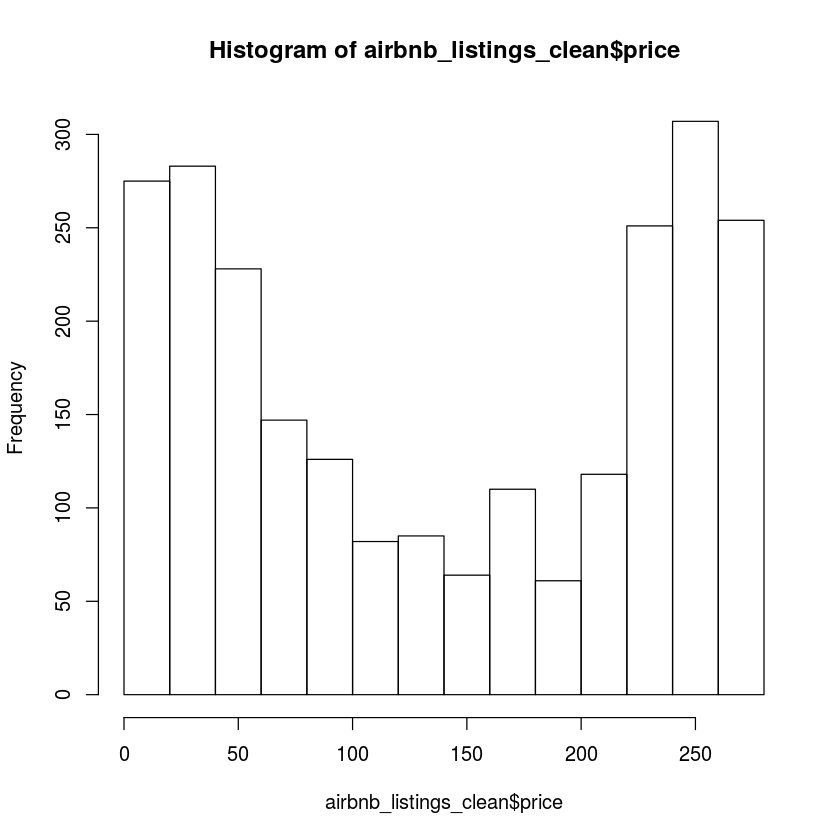

In [67]:
hist(airbnb_listings_clean$price)

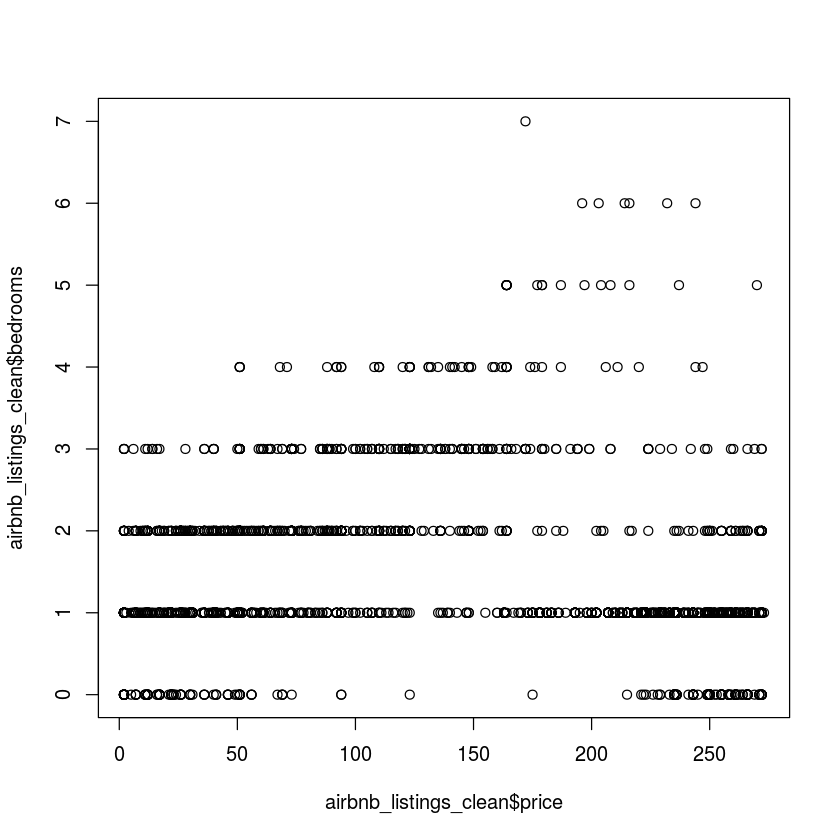

In [68]:
plot(airbnb_listings_clean$price, airbnb_listings_clean$bedrooms)

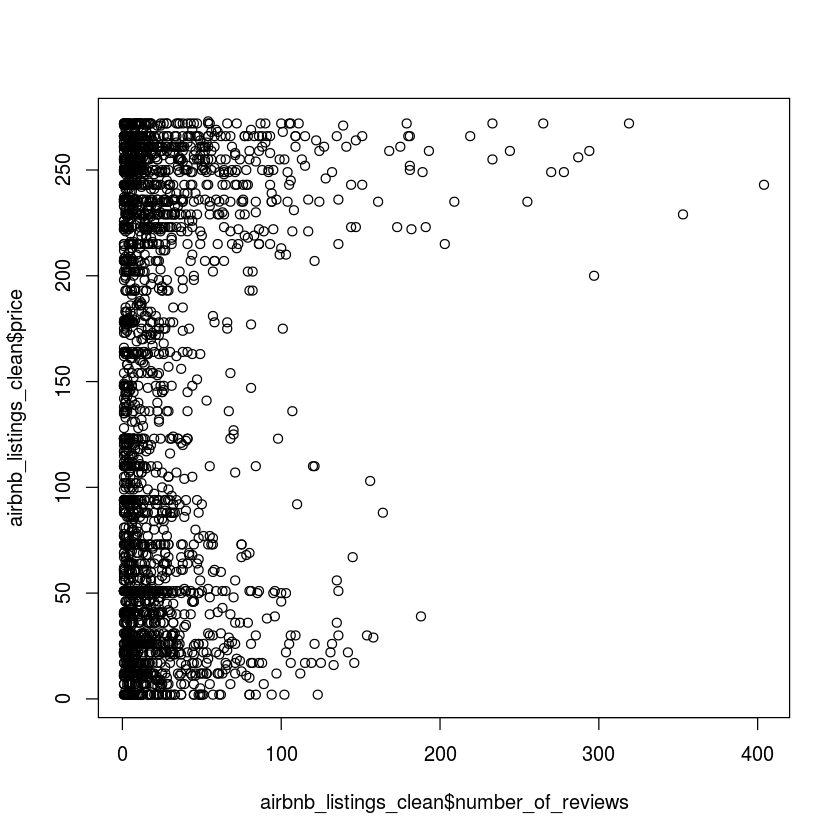

In [69]:
plot(airbnb_listings_clean$number_of_reviews, airbnb_listings_clean$price)

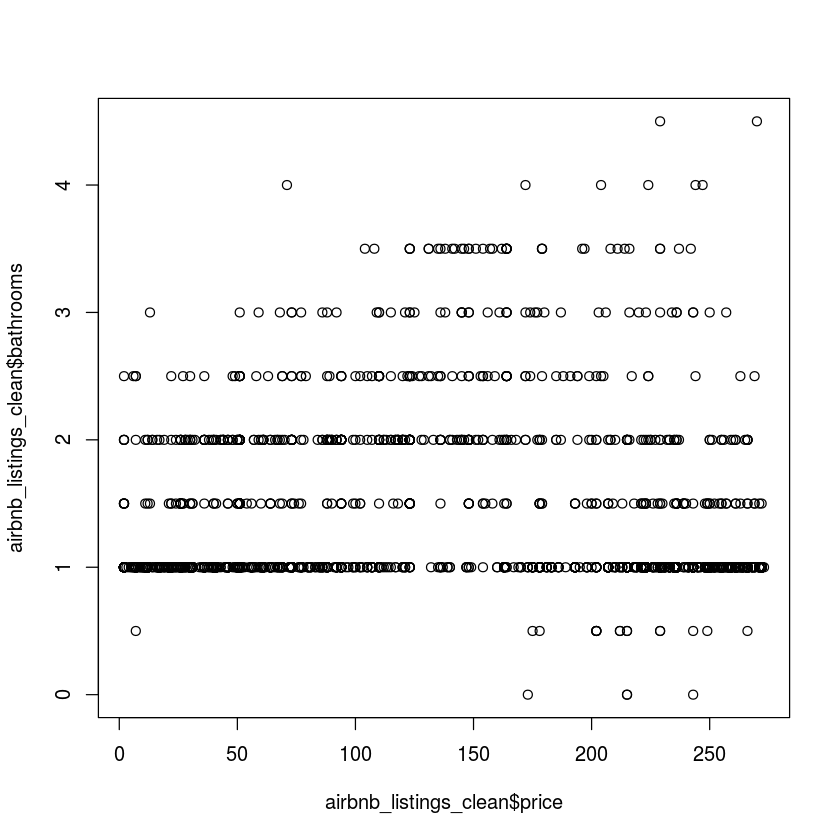

In [70]:
plot(airbnb_listings_clean$price, airbnb_listings_clean$bathrooms)

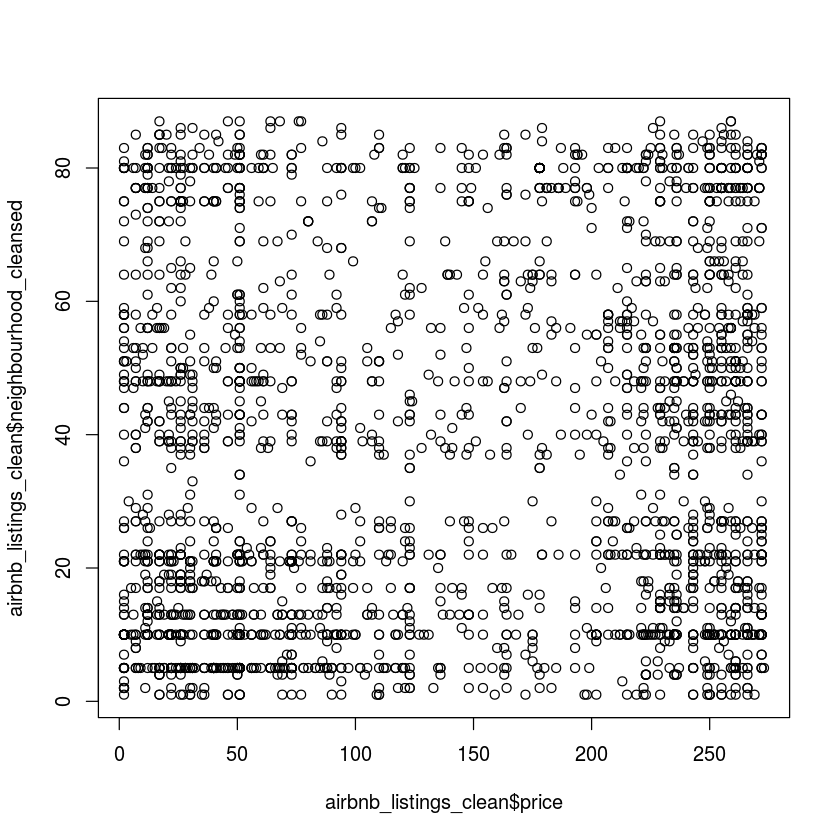

In [71]:
plot(airbnb_listings_clean$price, airbnb_listings_clean$neighbourhood_cleansed)

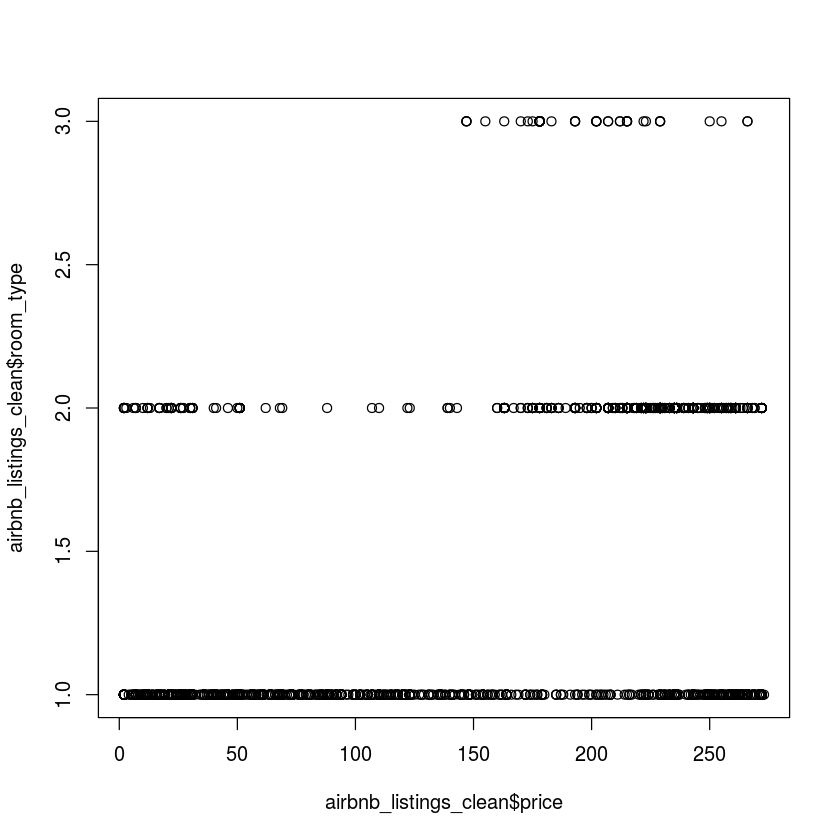

In [72]:
plot(airbnb_listings_clean$price, airbnb_listings_clean$room_type)

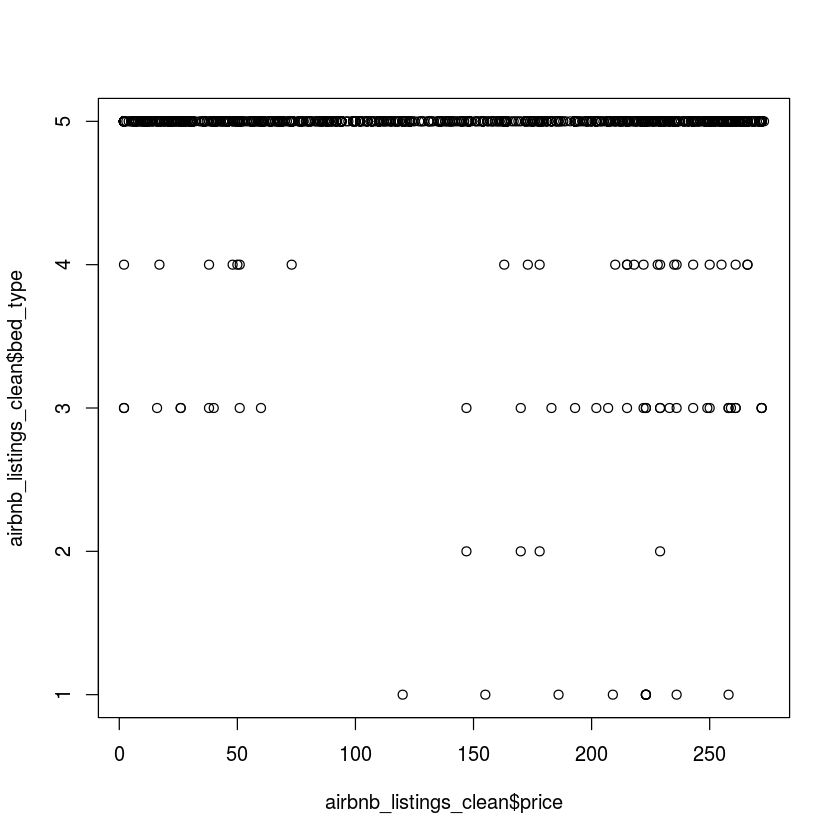

In [73]:
plot(airbnb_listings_clean$price, airbnb_listings_clean$bed_type)

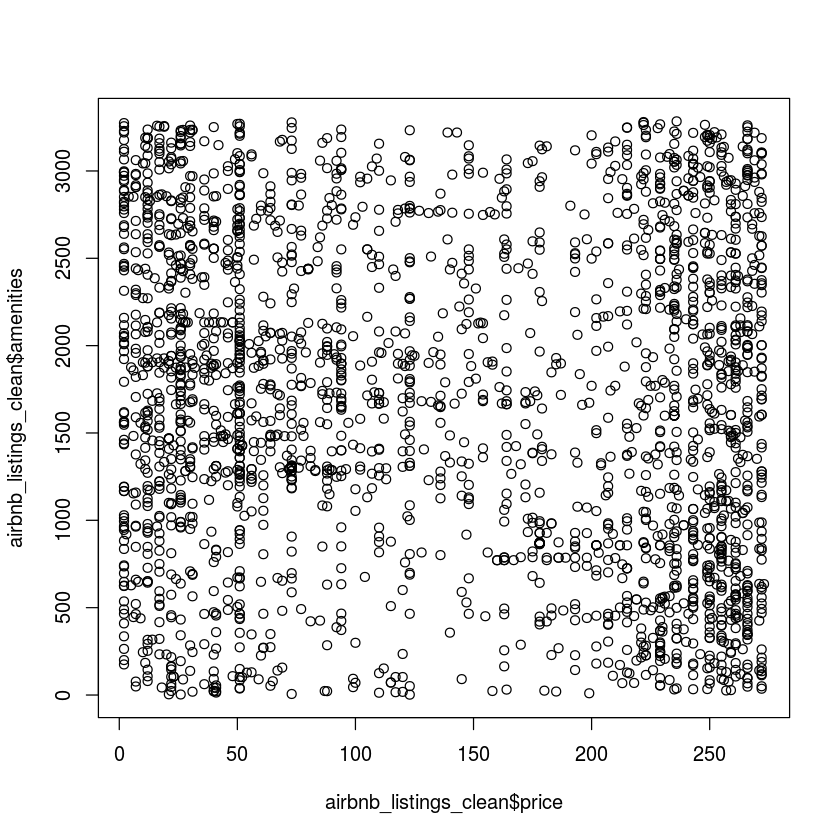

In [74]:
plot(airbnb_listings_clean$price, airbnb_listings_clean$amenities)

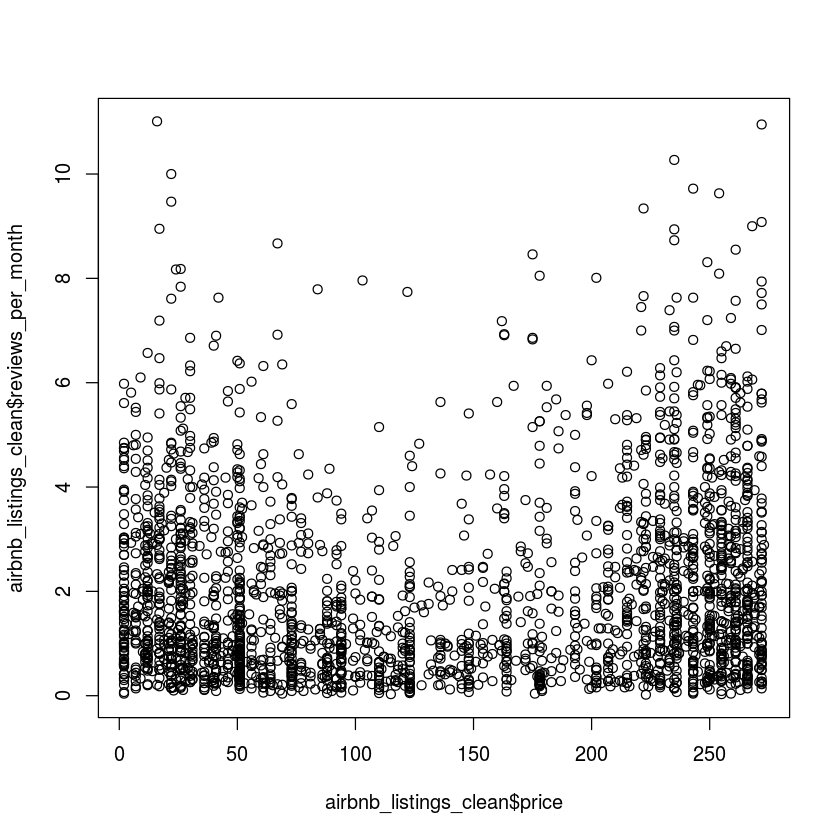

In [75]:
plot(airbnb_listings_clean$price, airbnb_listings_clean$reviews_per_month)

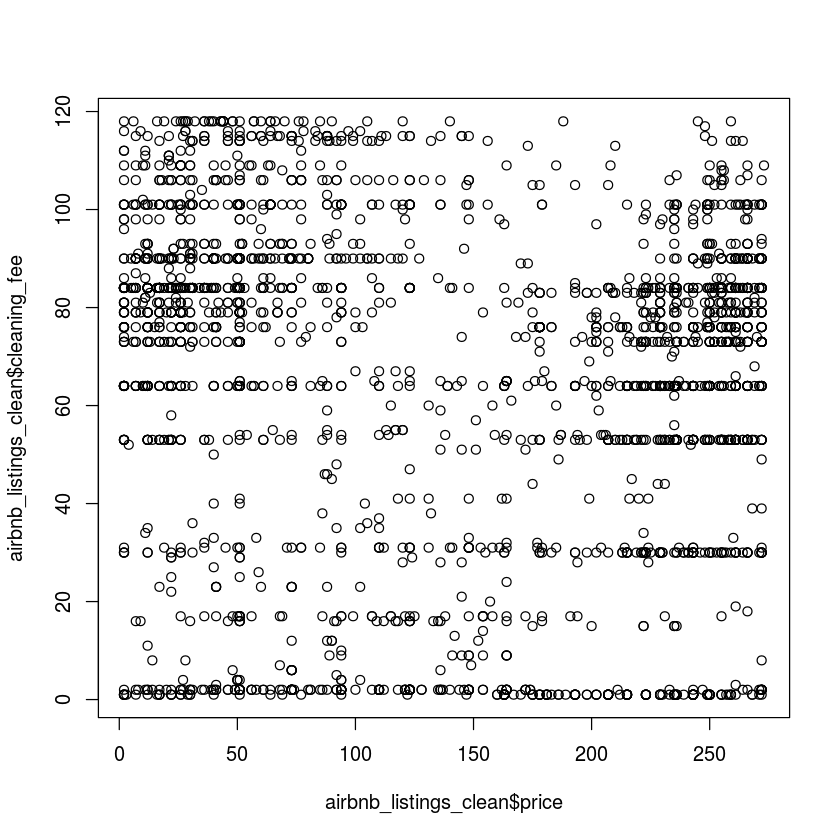

In [76]:
plot(airbnb_listings_clean$price, airbnb_listings_clean$cleaning_fee)

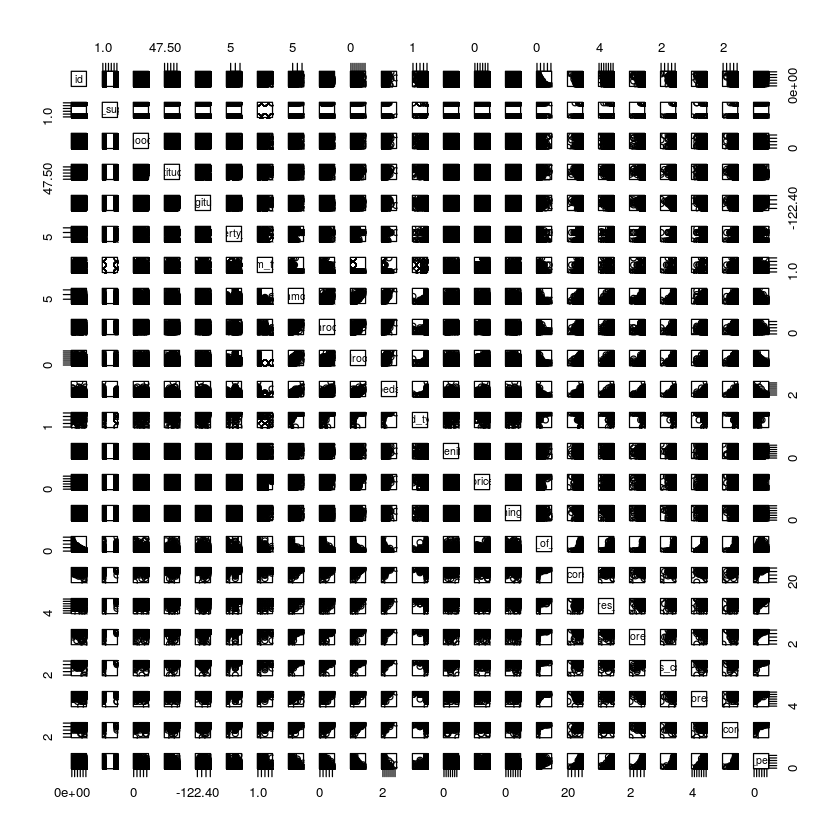

In [77]:
pairs(airbnb_listings_clean)

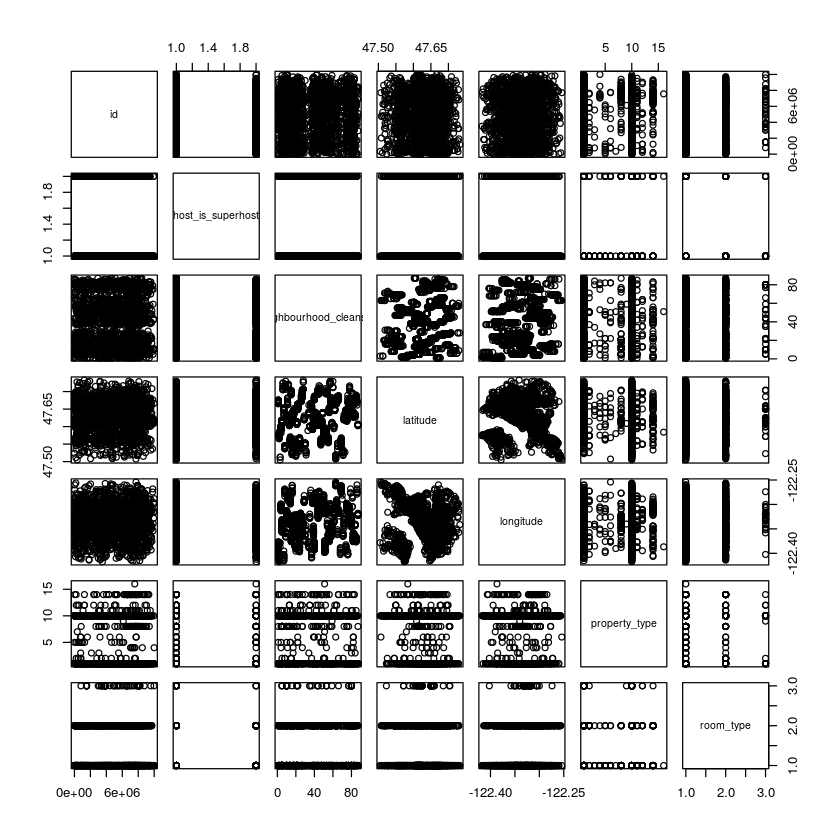

In [78]:
pairs(airbnb_listings_clean[1:7])

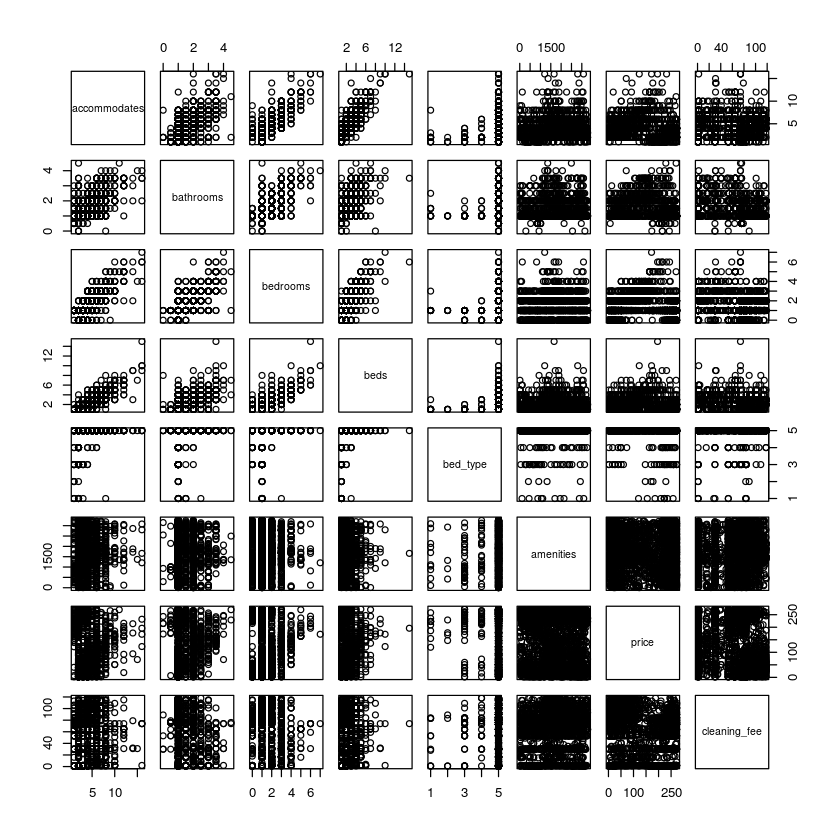

In [79]:
pairs(airbnb_listings_clean[8:15])

### Estruturado de datos

### Integración de los datos

El objetivo de este apartado es integrar todos los datasets, cada uno con su interpretabilidad deseada, en un único dataset. Tomaremos de base el dataset de casas de Airbnb sobre el cual agregaremos los datos del resto de datasets; para ello, realizamos los siguientes pasos.

#### Integración con  calendario de Airbnb

Añadimos al dataset de listings, la variable que nos indica una media de reservas al mes, para cuyo cálculo hay que recurrir al dataset calendar.

In [80]:
bookings_per_month=vector(mode='numeric',length=nrow(airbnb_listings_clean))

In [81]:
airbnb_listings_def = data.frame(airbnb_listings_clean,bookings_per_month)

In [82]:
max = nrow(airbnb_listings_def)

In [83]:
dim (airbnb_listings_def)

[1] 2391   24

In [84]:
for(i in 1:max){
    id = airbnb_listings_def[c(i:i),c(1:1)]
    airbnb_listings_def[c(i:i),c(24:24)] = round((nrow(airbnb_calendar[airbnb_calendar['listing_id'] == id & airbnb_calendar['available'] == 'f',]))/12,digits=0)
}

In [85]:
head(airbnb_listings_def, n=5)

,id,host_is_superhost,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,⋯,cleaning_fee,number_of_reviews,review_scores_rating,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,bookings_per_month
2,953595,t,West Queen Anne,47.63912,-122.3657,Apartment,Entire home/apt,4,1.0,1,⋯,79,43,96,10,10,10,10,10,1.48,6
3,3308979,f,West Queen Anne,47.62972,-122.3695,House,Entire home/apt,11,4.5,5,⋯,74,20,97,10,10,10,10,10,1.15,12
5,278830,f,West Queen Anne,47.63292,-122.3725,House,Entire home/apt,6,2.0,3,⋯,17,38,92,9,10,10,9,9,0.89,0
6,5956968,f,West Queen Anne,47.63053,-122.3662,House,Private room,2,1.0,1,⋯,79,17,95,10,10,10,10,10,2.45,5
8,856550,t,West Queen Anne,47.64016,-122.3759,Cabin,Private room,2,1.0,1,⋯,64,173,97,10,10,10,9,10,4.73,22


### Correlaciones

Una vez añadido este atributo, vamos a comprobar las correlaciones que tiene con los demás atributos relevantes, que pueden influir en el número de visitas por mes

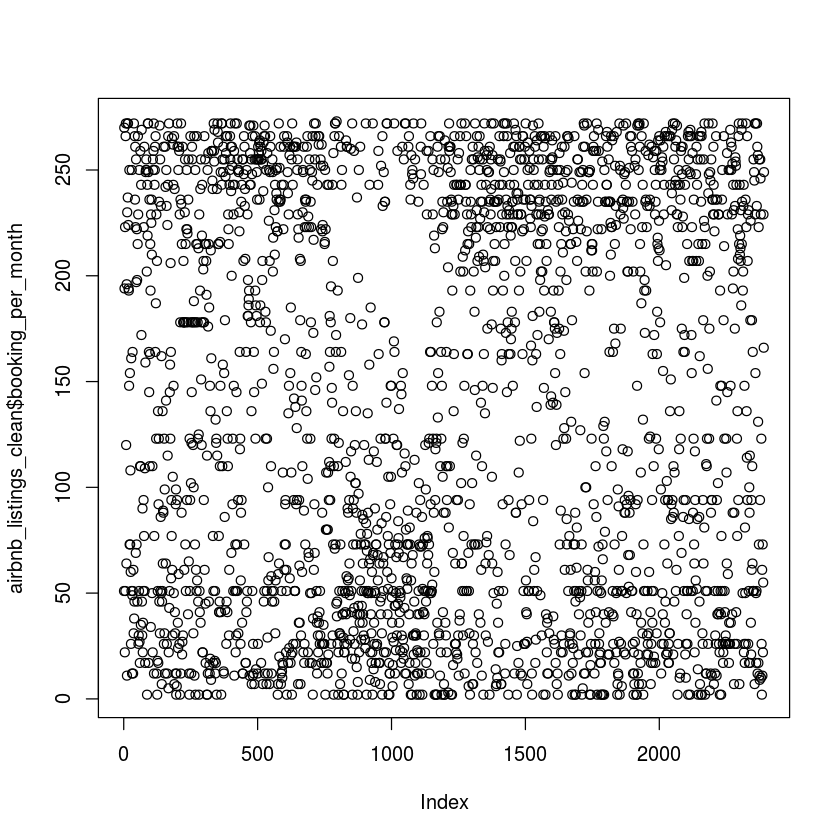

In [86]:
plot(airbnb_listings_clean$price, airbnb_listings_clean$booking_per_month)

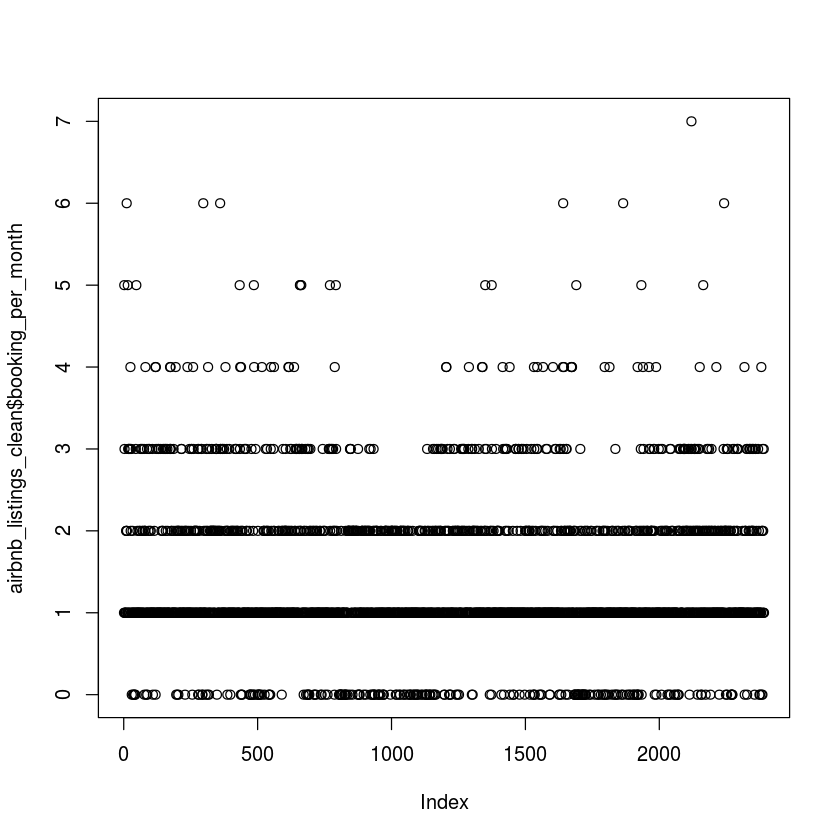

In [87]:
plot(airbnb_listings_clean$bedrooms, airbnb_listings_clean$booking_per_month)


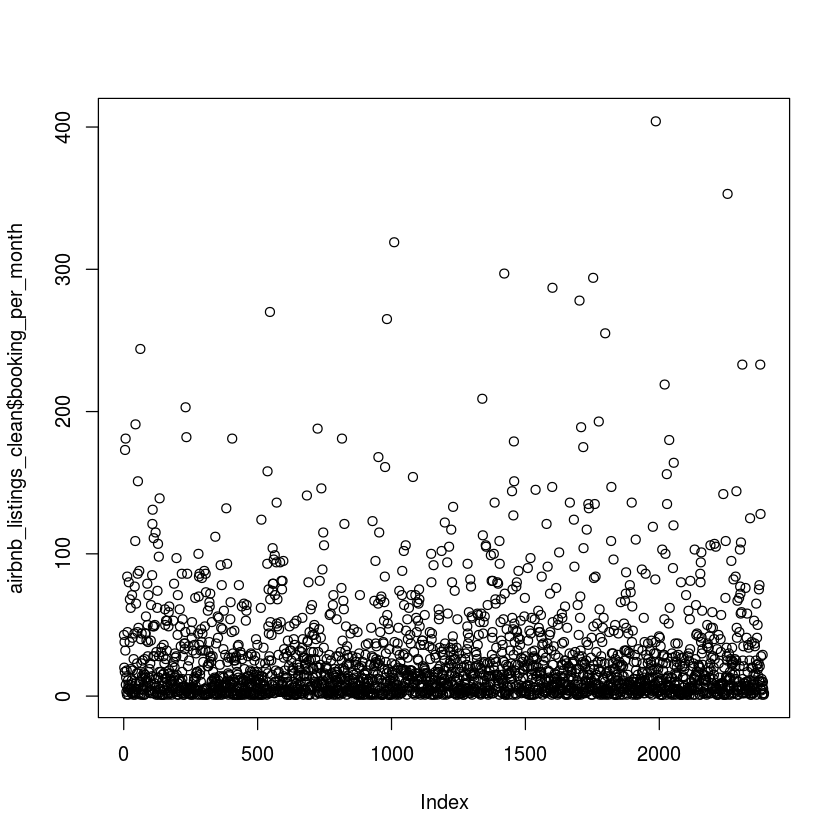

In [88]:
plot(airbnb_listings_clean$number_of_reviews, airbnb_listings_clean$booking_per_month)


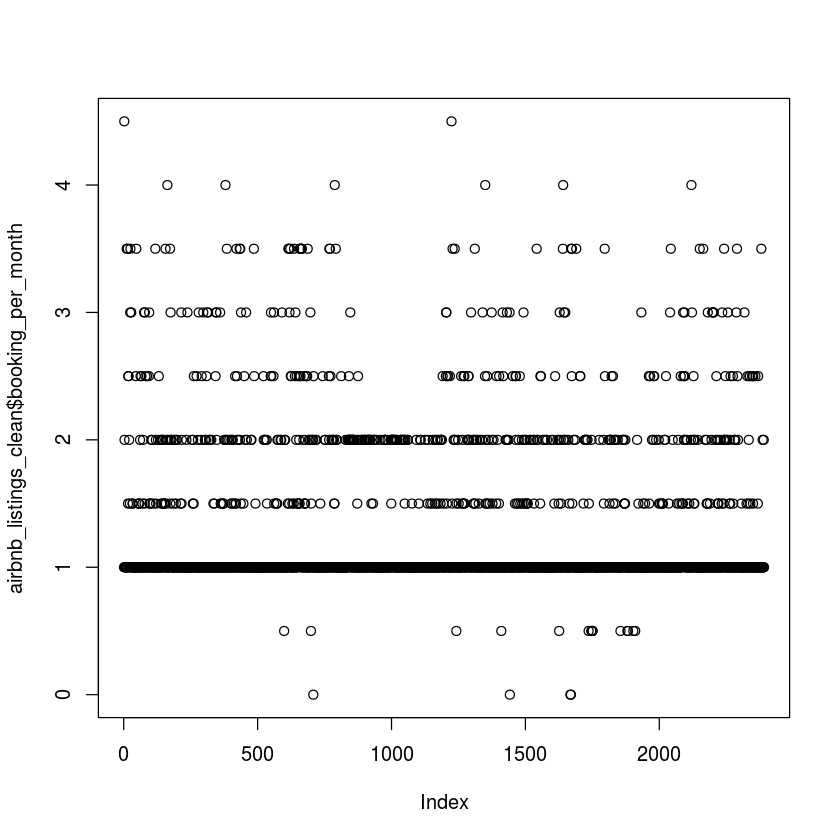

In [89]:
plot(airbnb_listings_clean$bathrooms, airbnb_listings_clean$booking_per_month)


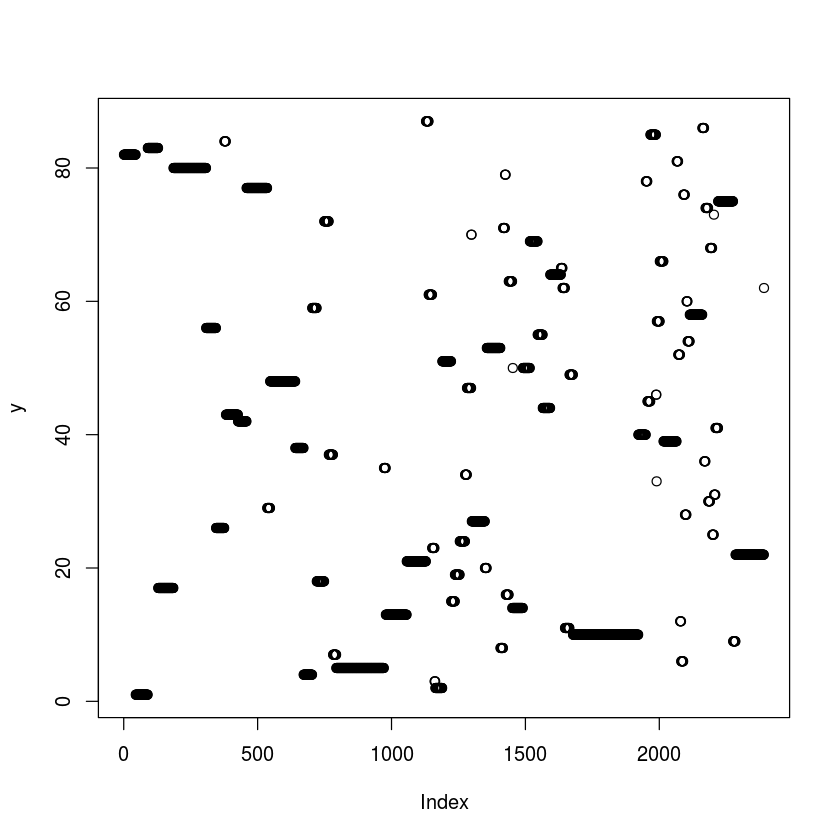

In [90]:
plot(airbnb_listings_clean$neighbourhood_cleansed, airbnb_listings_clean$booking_per_month)


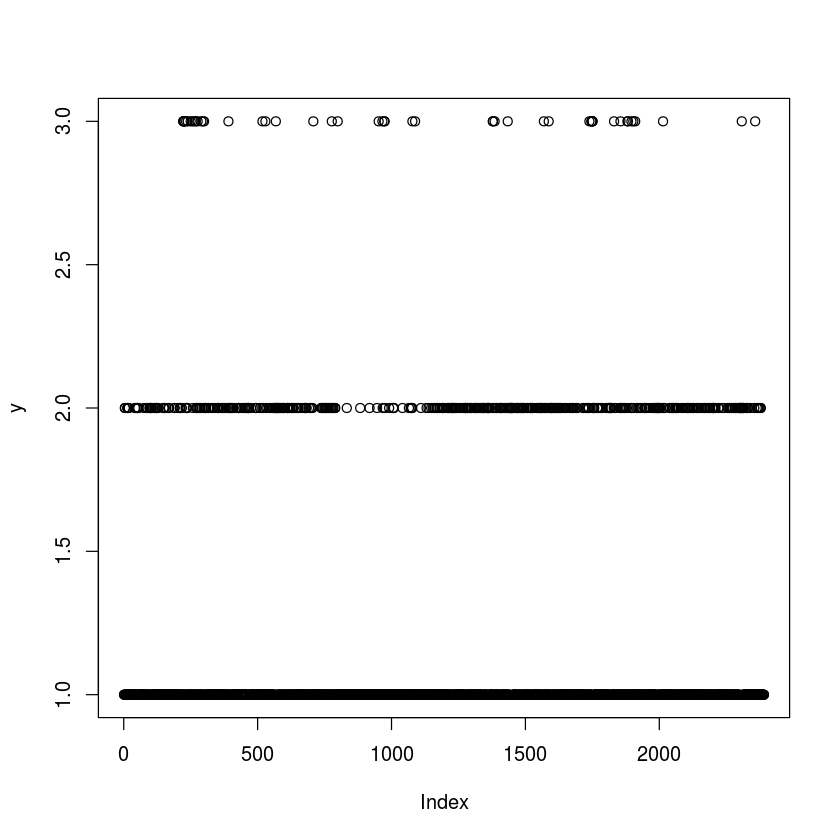

In [91]:
plot(airbnb_listings_clean$room_type, airbnb_listings_clean$booking_per_month)


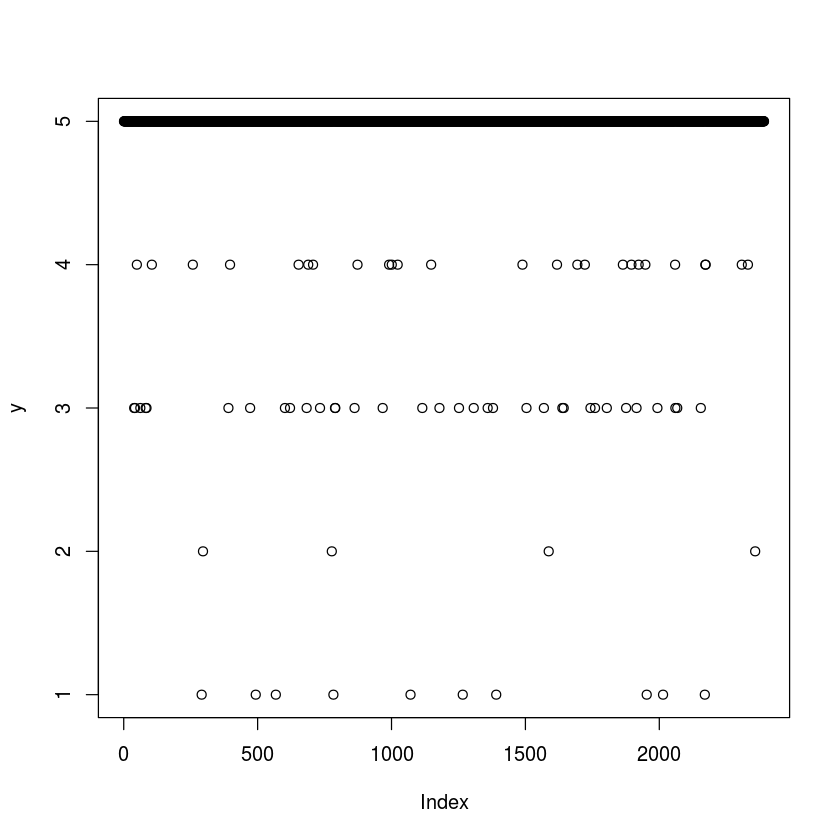

In [92]:
plot(airbnb_listings_clean$bed_type, airbnb_listings_clean$booking_per_month)


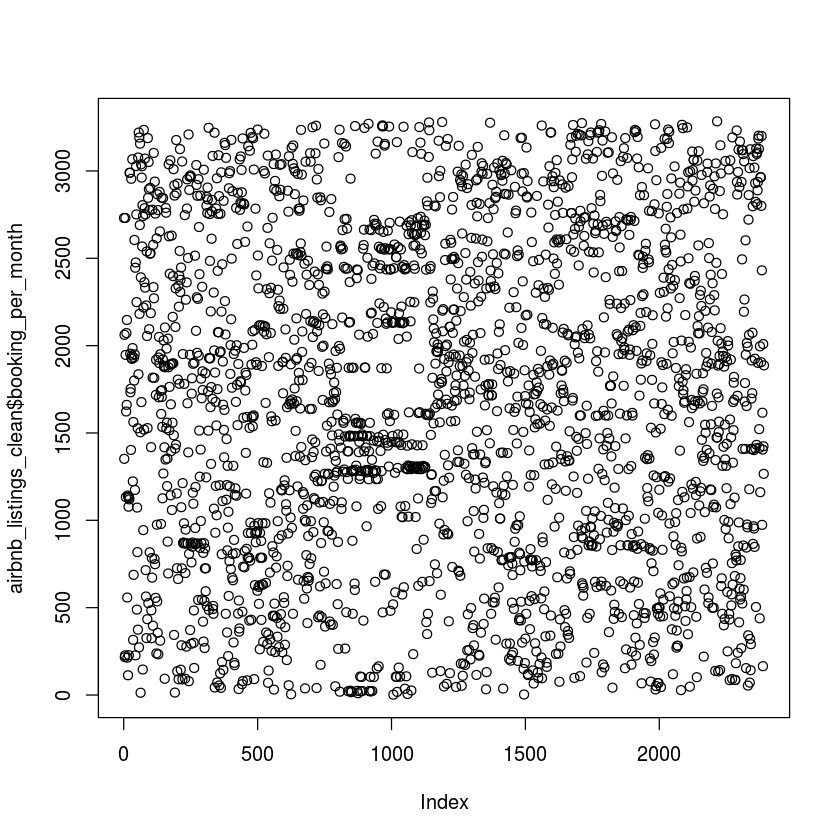

In [93]:
plot(airbnb_listings_clean$amenities, airbnb_listings_clean$booking_per_month)


#### Integración con  espacios culturales de Seattle

Introducimos lo necesario para integrar el dataframe de espacios culturales en el dataframe final basado en listings. Para ello, calcularemos la distancia entre una casa de Airbnb y un espacio cultural. En este paso integramos la latitud y la longitud en el dataset que está contenida en el atributo _Location_; Esto nos facilitará integrar los datos.

In [95]:
head(cultural_spaces_clean$Location)

[1] (47.6186813, -122.3249251) (47.6205686, -122.350491) 
[3] (47.66116, -122.326927)    (47.6142449, -122.1934783)
[5] (47.6405288, -122.3758254) (47.6492209, -122.3770904)
1100 Levels: (47.188389, -122.008777) ... (47.805356, -122.148902)

In [110]:
head(cultural_spaces_clean)

,Dominant.Discipline,Location,Latitude,Longitude
2,Visual,"(47.6186813, -122.3249251)",47.61868,-122.3249
3,Visual,"(47.6205686, -122.350491)",47.62057,-122.3505
5,Music,"(47.66116, -122.326927)",47.66116,-122.3269
6,Arts/Cultrual Administration or Advocacy,"(47.6142449, -122.1934783)",47.61424,-122.1935
8,Service/Supply,"(47.6405288, -122.3758254)",47.64053,-122.3758
9,Visual,"(47.6492209, -122.3770904)",47.64922,-122.3771


In [108]:
cultural_spaces_clean['Latitude'] <- NA #3
cultural_spaces_clean['Longitude'] <- NA #4

for (i in 1:nrow(cultural_spaces)){
    loc = unlist(strsplit(as.character(cultural_spaces_clean[i,2]), ","))
    if(length(loc)>0){
        loc_parse <- gsub("[^0-9.-]", "", loc)
        cultural_spaces_clean[i,3] <- as.numeric(loc_parse[1])
        cultural_spaces_clean[i,4] <- as.numeric(loc_parse[2])
    }
}

In [109]:
cultural_spaces_clean$Latitude[2]

[1] 47.62057

In [113]:
# Test
distm(c(cultural_spaces_clean$Longitude[3], cultural_spaces_clean$Latitude[3]), c(airbnb_listings_clean$longitude[1], airbnb_listings_clean$latitude[1]), fun = distHaversine)

3802.308


Distancia máxima en metros en la cual se tendran en cuenta los espacios culturales y se incrementaran. 

In [114]:
max_distance <- 4000

In [115]:
airbnb_listings_clean['num_cultural_spaces_lt4km'] <- NA #3

In [116]:
head(airbnb_listings_pre$latitude)

[1] 47.63629 47.63912 47.62972 47.63847 47.63292 47.63053

In [117]:
tail(airbnb_listings_pre$latitude)

[1] 47.65452 47.66429 47.64955 47.50845 47.63233 47.64119

In [118]:
head(airbnb_listings_pre$longitud)

[1] -122.3710 -122.3657 -122.3695 -122.3693 -122.3725 -122.3662

In [119]:
tail(airbnb_listings_pre$longitud)

[1] -122.3581 -122.3592 -122.3183 -122.2406 -122.2755 -122.3421

___Nota: La ejecución de la siguiente celda toma varias horas, por ello, se ejecutó una vez durante el desarrollo del proyecto y se guardó en un `.Rda`, el cual cargamos e integramos en nuestro dataframe en sustitución a la ejecución de nuevo de la celda___

In [28]:
max_distance <- 5000

for (i in 1:nrow(airbnb_listings_pre)){
    for (j in 1:nrow(cultural_spaces)){
        distance <- as.numeric(distm(c(cultural_spaces[j,42], cultural_spaces[j,41]), c(airbnb_listings_pre[i,5], airbnb_listings_pre[i,4]), fun = distHaversine))
        if(!is.na(distance) && (distance < max_distance)){
            airbnb_listings_pre[i,24] <- airbnb_listings_pre[i,24] + 1
            cat("i: ",i,"- j: ",j,"- d: ",distance,"\n")
        }
    }    
}

In [120]:
load("df_with_spaces_aggregate.Rda")

In [121]:
names(airbnb_listings_pre)

[1] "id"                          "host_is_superhost"          
 [3] "neighbourhood_cleansed"      "latitude"                   
 [5] "longitude"                   "property_type"              
 [7] "room_type"                   "accommodates"               
 [9] "bathrooms"                   "bedrooms"                   
[11] "beds"                        "bed_type"                   
[13] "amenities"                   "price"                      
[15] "cleaning_fee"                "number_of_reviews"          
[17] "review_scores_rating"        "review_scores_cleanliness"  
[19] "review_scores_checkin"       "review_scores_communication"
[21] "review_scores_location"      "review_scores_value"        
[23] "reviews_per_month"           "Num.Cultural.Spaces"

In [122]:
dim(airbnb_listings_pre)

[1] 3818   24

In [131]:
airbnb_listings_pre['Num.Cultural.Spaces']

Num.Cultural.Spaces
1070
1151
1144
843
587
707
628
495
907
643


In [125]:
#airbnb_listings_clean['num_cultural_spaces_lt4km'] <- airbnb_listings_pre['Num.Cultural.Spaces']


mrg <- merge(x=airbnb_listings_clean,y=airbnb_listings_pre,by="id")['Num.Cultural.Spaces']

In [133]:
head(mrg)

Num.Cultural.Spaces
186
37
285
48
48
269


In [134]:
airbnb_listings_clean['num_cultural_spaces_lt4km'] <- mrg

In [135]:
head(airbnb_listings_clean['num_cultural_spaces_lt4km'])

,num_cultural_spaces_lt4km
2,186
3,37
5,285
6,48
8,48
10,269


In [136]:
tail(airbnb_listings_clean['num_cultural_spaces_lt4km'])

,num_cultural_spaces_lt4km
3809,365
3810,421
3811,421
3812,372
3814,427
3815,128


In [138]:
names(airbnb_listings_clean)

[1] "id"                          "host_is_superhost"          
 [3] "neighbourhood_cleansed"      "latitude"                   
 [5] "longitude"                   "property_type"              
 [7] "room_type"                   "accommodates"               
 [9] "bathrooms"                   "bedrooms"                   
[11] "beds"                        "bed_type"                   
[13] "amenities"                   "price"                      
[15] "cleaning_fee"                "number_of_reviews"          
[17] "review_scores_rating"        "review_scores_cleanliness"  
[19] "review_scores_checkin"       "review_scores_communication"
[21] "review_scores_location"      "review_scores_value"        
[23] "reviews_per_month"           "num_cultural_spaces_lt4km"

### Adaptación de variables categóricas a variables binarizadas

A continuación pasamos a aplicar la función one_hot sobre los demás factores, la cual convierte los factores en múltiples vectores binarizados.
Lo que nos servirá para poder posteriormente aplicar los modelos correctamente.
Primero pasaremos la variable que define el barrio de tipo factor a cadena de caracteres y posteriormente a binario los factores restantes.

In [222]:
airbnb_listings_clean <- one_hot(as.data.table(airbnb_listings_clean))

Pasamos a ver como ha quedado el dataset

In [223]:
str(airbnb_listings_clean)

Classes ‘data.table’ and 'data.frame':	2391 obs. of  130 variables:
 $ id                                              : int  953595 3308979 278830 5956968 856550 2493658 175576 4454295 3883392 8889257 ...
 $ host_is_superhost_f                             : int  0 1 1 1 0 0 0 1 0 1 ...
 $ host_is_superhost_t                             : int  1 0 0 0 1 1 1 0 1 0 ...
 $ neighbourhood_cleansed_Adams                    : int  0 0 0 0 0 0 0 0 0 0 ...
 $ neighbourhood_cleansed_Alki                     : int  0 0 0 0 0 0 0 0 0 0 ...
 $ neighbourhood_cleansed_Arbor Heights            : int  0 0 0 0 0 0 0 0 0 0 ...
 $ neighbourhood_cleansed_Atlantic                 : int  0 0 0 0 0 0 0 0 0 0 ...
 $ neighbourhood_cleansed_Belltown                 : int  0 0 0 0 0 0 0 0 0 0 ...
 $ neighbourhood_cleansed_Bitter Lake              : int  0 0 0 0 0 0 0 0 0 0 ...
 $ neighbourhood_cleansed_Briarcliff               : int  0 0 0 0 0 0 0 0 0 0 ...
 $ neighbourhood_cleansed_Brighton                 : int

### Unificación en un dataframe

Una vez hemos realizado una limpieza de todos los datos que utilizaremos en el modelado y que hemos integrado los diferentes dataframes que hemos seleccionado en el proyecto, procedemos a unificar todos los dataframes en uno.

In [224]:
df <- airbnb_listings_clean

In [225]:
names(df)

[1] "id"                                              
  [2] "host_is_superhost_f"                             
  [3] "host_is_superhost_t"                             
  [4] "neighbourhood_cleansed_Adams"                    
  [5] "neighbourhood_cleansed_Alki"                     
  [6] "neighbourhood_cleansed_Arbor Heights"            
  [7] "neighbourhood_cleansed_Atlantic"                 
  [8] "neighbourhood_cleansed_Belltown"                 
  [9] "neighbourhood_cleansed_Bitter Lake"              
 [10] "neighbourhood_cleansed_Briarcliff"               
 [11] "neighbourhood_cleansed_Brighton"                 
 [12] "neighbourhood_cleansed_Broadview"                
 [13] "neighbourhood_cleansed_Broadway"                 
 [14] "neighbourhood_cleansed_Bryant"                   
 [15] "neighbourhood_cleansed_Cedar Park"               
 [16] "neighbourhood_cleansed_Central Business District"
 [17] "neighbourhood_cleansed_Columbia City"            
 [18] "neighbourhood_cleansed_Crown Hill"               
 [19] "neighbourhood_cleansed_Dunlap"                   
 [20] "neighbourhood_cleansed_East Queen Anne"          
 [21] "neighbourhood_cleansed_Eastlake"                 
 [22] "neighbourhood_cleansed_Fairmount Park"           
 [23] "neighbourhood_cleansed_Fauntleroy"               
 [24] "neighbourhood_cleansed_First Hill"               
 [25] "neighbourhood_cleansed_Fremont"                  
 [26] "neighbourhood_cleansed_Gatewood"                 
 [27] "neighbourhood_cleansed_Genesee"                  
 [28] "neighbourhood_cleansed_Georgetown"               
 [29] "neighbourhood_cleansed_Green Lake"               
 [30] "neighbourhood_cleansed_Greenwood"                
 [31] "neighbourhood_cleansed_Haller Lake"              
 [32] "neighbourhood_cleansed_Harrison/Denny-Blaine"    
 [33] "neighbourhood_cleansed_High Point"               
 [34] "neighbourhood_cleansed_Highland Park"            
 [35] "neighbourhood_cleansed_Industrial District"      
 [36] "neighbourhood_cleansed_Interbay"                 
 [37] "neighbourhood_cleansed_International District"   
 [38] "neighbourhood_cleansed_Laurelhurst"              
 [39] "neighbourhood_cleansed_Lawton Park"              
 [40] "neighbourhood_cleansed_Leschi"                   
 [41] "neighbourhood_cleansed_Lower Queen Anne"         
 [42] "neighbourhood_cleansed_Loyal Heights"            
 [43] "neighbourhood_cleansed_Madison Park"             
 [44] "neighbourhood_cleansed_Madrona"                  
 [45] "neighbourhood_cleansed_Mann"                     
 [46] "neighbourhood_cleansed_Maple Leaf"               
 [47] "neighbourhood_cleansed_Matthews Beach"           
 [48] "neighbourhood_cleansed_Meadowbrook"              
 [49] "neighbourhood_cleansed_Mid-Beacon Hill"          
 [50] "neighbourhood_cleansed_Minor"                    
 [51] "neighbourhood_cleansed_Montlake"                 
 [52] "neighbourhood_cleansed_Mount Baker"              
 [53] "neighbourhood_cleansed_North Admiral"            
 [54] "neighbourhood_cleansed_North Beach/Blue Ridge"   
 [55] "neighbourhood_cleansed_North Beacon Hill"        
 [56] "neighbourhood_cleansed_North College Park"       
 [57] "neighbourhood_cleansed_North Delridge"           
 [58] "neighbourhood_cleansed_North Queen Anne"         
 [59] "neighbourhood_cleansed_Olympic Hills"            
 [60] "neighbourhood_cleansed_Phinney Ridge"            
 [61] "neighbourhood_cleansed_Pike-Market"              
 [62] "neighbourhood_cleansed_Pinehurst"                
 [63] "neighbourhood_cleansed_Pioneer Square"           
 [64] "neighbourhood_cleansed_Portage Bay"              
 [65] "neighbourhood_cleansed_Rainier Beach"            
 [66] "neighbourhood_cleansed_Ravenna"                  
 [67] "neighbourhood_cleansed_Riverview"                
 [68] "neighbourhood_cleansed_Roosevelt"                
 [69] "neighbourhood_cleansed_Seaview"                  
 [70] "neighbourhood_cleansed_Seward Park"              
 [71] "neigh

In [226]:
dim(df)

[1] 2391  130

In [227]:
df = data.frame(df,airbnb_listings_def['bookings_per_month'])

In [228]:
str(df)

'data.frame':	2391 obs. of  131 variables:
 $ id                                              : int  953595 3308979 278830 5956968 856550 2493658 175576 4454295 3883392 8889257 ...
 $ host_is_superhost_f                             : int  0 1 1 1 0 0 0 1 0 1 ...
 $ host_is_superhost_t                             : int  1 0 0 0 1 1 1 0 1 0 ...
 $ neighbourhood_cleansed_Adams                    : int  0 0 0 0 0 0 0 0 0 0 ...
 $ neighbourhood_cleansed_Alki                     : int  0 0 0 0 0 0 0 0 0 0 ...
 $ neighbourhood_cleansed_Arbor.Heights            : int  0 0 0 0 0 0 0 0 0 0 ...
 $ neighbourhood_cleansed_Atlantic                 : int  0 0 0 0 0 0 0 0 0 0 ...
 $ neighbourhood_cleansed_Belltown                 : int  0 0 0 0 0 0 0 0 0 0 ...
 $ neighbourhood_cleansed_Bitter.Lake              : int  0 0 0 0 0 0 0 0 0 0 ...
 $ neighbourhood_cleansed_Briarcliff               : int  0 0 0 0 0 0 0 0 0 0 ...
 $ neighbourhood_cleansed_Brighton                 : int  0 0 0 0 0 0 0 0 0 0 ...

In [229]:
head(df, n=10)

,id,host_is_superhost_f,host_is_superhost_t,neighbourhood_cleansed_Adams,neighbourhood_cleansed_Alki,neighbourhood_cleansed_Arbor.Heights,neighbourhood_cleansed_Atlantic,neighbourhood_cleansed_Belltown,neighbourhood_cleansed_Bitter.Lake,neighbourhood_cleansed_Briarcliff,⋯,number_of_reviews,review_scores_rating,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,num_cultural_spaces_lt4km,bookings_per_month
2,953595,0,1,0,0,0,0,0,0,0,⋯,43,96,10,10,10,10,10,1.48,186,6
3,3308979,1,0,0,0,0,0,0,0,0,⋯,20,97,10,10,10,10,10,1.15,37,12
5,278830,1,0,0,0,0,0,0,0,0,⋯,38,92,9,10,10,9,9,0.89,285,0
6,5956968,1,0,0,0,0,0,0,0,0,⋯,17,95,10,10,10,10,10,2.45,48,5
8,856550,0,1,0,0,0,0,0,0,0,⋯,173,97,10,10,10,9,10,4.73,48,22
10,2493658,0,1,0,0,0,0,0,0,0,⋯,32,97,10,10,10,10,9,1.55,269,3
11,175576,0,1,0,0,0,0,0,0,0,⋯,181,97,10,10,10,10,10,3.33,274,18
12,4454295,1,0,0,0,0,0,0,0,0,⋯,8,97,10,9,10,10,9,0.98,430,11
13,3883392,0,1,0,0,0,0,0,0,0,⋯,13,98,10,10,10,10,10,0.92,403,0
14,8889257,1,0,0,0,0,0,0,0,0,⋯,3,100,10,9,9,10,10,3.00,137,2


In [230]:
tail(df, n=10)

,id,host_is_superhost_f,host_is_superhost_t,neighbourhood_cleansed_Adams,neighbourhood_cleansed_Alki,neighbourhood_cleansed_Arbor.Heights,neighbourhood_cleansed_Atlantic,neighbourhood_cleansed_Belltown,neighbourhood_cleansed_Bitter.Lake,neighbourhood_cleansed_Briarcliff,⋯,number_of_reviews,review_scores_rating,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,num_cultural_spaces_lt4km,bookings_per_month
3805,7178490,0,1,0,0,0,0,0,0,0,⋯,12,95,10,10,10,10,10,2.34,87,1
3806,8054902,1,0,0,0,0,0,0,0,0,⋯,10,98,10,10,10,10,10,3.95,409,3
3807,5458027,0,1,0,0,0,0,0,0,0,⋯,1,100,10,10,10,10,10,0.24,437,21
3808,4940491,1,0,0,0,0,0,0,0,0,⋯,7,97,10,10,10,10,9,0.78,418,3
3809,1844791,1,0,0,0,0,0,0,0,0,⋯,29,96,9,10,10,10,9,1.15,365,6
3810,6120046,1,0,0,0,0,0,0,0,0,⋯,10,80,7,9,9,9,8,1.18,421,0
3811,262764,1,0,0,0,0,0,0,0,0,⋯,5,92,8,10,10,10,8,1.56,421,12
3812,8578490,1,0,0,0,0,0,0,0,0,⋯,2,100,8,10,10,10,10,0.63,372,12
3814,8101950,1,0,0,0,0,0,0,0,0,⋯,1,80,10,4,8,10,8,0.30,427,28
3815,8902327,1,0,0,0,0,0,0,0,0,⋯,2,100,10,10,10,10,10,2.00,128,8


Antes de finalizar esta fase, eliminaremos todas las variables que han sido utilizadas para cruzar con otros dataframes y no tienen ninguna otra utilidad en nuestro análisis, como son `id`, `latitude` y `longitud`.

In [231]:
df <- df[,-c(1,5,6)]

In [232]:
names(df)

[1] "host_is_superhost_f"                             
  [2] "host_is_superhost_t"                             
  [3] "neighbourhood_cleansed_Adams"                    
  [4] "neighbourhood_cleansed_Atlantic"                 
  [5] "neighbourhood_cleansed_Belltown"                 
  [6] "neighbourhood_cleansed_Bitter.Lake"              
  [7] "neighbourhood_cleansed_Briarcliff"               
  [8] "neighbourhood_cleansed_Brighton"                 
  [9] "neighbourhood_cleansed_Broadview"                
 [10] "neighbourhood_cleansed_Broadway"                 
 [11] "neighbourhood_cleansed_Bryant"                   
 [12] "neighbourhood_cleansed_Cedar.Park"               
 [13] "neighbourhood_cleansed_Central.Business.District"
 [14] "neighbourhood_cleansed_Columbia.City"            
 [15] "neighbourhood_cleansed_Crown.Hill"               
 [16] "neighbourhood_cleansed_Dunlap"                   
 [17] "neighbourhood_cleansed_East.Queen.Anne"          
 [18] "neighbourhood_cleansed_Eastlake"                 
 [19] "neighbourhood_cleansed_Fairmount.Park"           
 [20] "neighbourhood_cleansed_Fauntleroy"               
 [21] "neighbourhood_cleansed_First.Hill"               
 [22] "neighbourhood_cleansed_Fremont"                  
 [23] "neighbourhood_cleansed_Gatewood"                 
 [24] "neighbourhood_cleansed_Genesee"                  
 [25] "neighbourhood_cleansed_Georgetown"               
 [26] "neighbourhood_cleansed_Green.Lake"               
 [27] "neighbourhood_cleansed_Greenwood"                
 [28] "neighbourhood_cleansed_Haller.Lake"              
 [29] "neighbourhood_cleansed_Harrison.Denny.Blaine"    
 [30] "neighbourhood_cleansed_High.Point"               
 [31] "neighbourhood_cleansed_Highland.Park"            
 [32] "neighbourhood_cleansed_Industrial.District"      
 [33] "neighbourhood_cleansed_Interbay"                 
 [34] "neighbourhood_cleansed_International.District"   
 [35] "neighbourhood_cleansed_Laurelhurst"              
 [36] "neighbourhood_cleansed_Lawton.Park"              
 [37] "neighbourhood_cleansed_Leschi"                   
 [38] "neighbourhood_cleansed_Lower.Queen.Anne"         
 [39] "neighbourhood_cleansed_Loyal.Heights"            
 [40] "neighbourhood_cleansed_Madison.Park"             
 [41] "neighbourhood_cleansed_Madrona"                  
 [42] "neighbourhood_cleansed_Mann"                     
 [43] "neighbourhood_cleansed_Maple.Leaf"               
 [44] "neighbourhood_cleansed_Matthews.Beach"           
 [45] "neighbourhood_cleansed_Meadowbrook"              
 [46] "neighbourhood_cleansed_Mid.Beacon.Hill"          
 [47] "neighbourhood_cleansed_Minor"                    
 [48] "neighbourhood_cleansed_Montlake"                 
 [49] "neighbourhood_cleansed_Mount.Baker"              
 [50] "neighbourhood_cleansed_North.Admiral"            
 [51] "neighbourhood_cleansed_North.Beach.Blue.Ridge"   
 [52] "neighbourhood_cleansed_North.Beacon.Hill"        
 [53] "neighbourhood_cleansed_North.College.Park"       
 [54] "neighbourhood_cleansed_North.Delridge"           
 [55] "neighbourhood_cleansed_North.Queen.Anne"         
 [56] "neighbourhood_cleansed_Olympic.Hills"            
 [57] "neighbourhood_cleansed_Phinney.Ridge"            
 [58] "neighbourhood_cleansed_Pike.Market"              
 [59] "neighbourhood_cleansed_Pinehurst"                
 [60] "neighbourhood_cleansed_Pioneer.Square"           
 [61] "neighbourhood_cleansed_Portage.Bay"              
 [62] "neighbourhood_cleansed_Rainier.Beach"            
 [63] "neighbourhood_cleansed_Ravenna"                  
 [64] "neighbourhood_cleansed_Riverview"                
 [65] "neighbourhood_cleansed_Roosevelt"                
 [66] "neighbourhood_cleansed_Seaview"                  
 [67] "neighbourhood_cleansed_Seward.Park"              
 [68] "neighbourhood_cleansed_South.Beacon.Hill"        
 [69] "neighbourhood_cleansed_South.Delridge"           
 [70] "neighbourhood_cleansed_South.Lake.Union"         
 [71] "neigh

`df` es el dataframe que utilizaremos de ahora en adelante en nuestro análisis. Para evitar realizar de nuevo toda la computación dedicada a la preparación de este dataframe, lo guardaremos como un objeto `.Rda` para poder volver a cargarlo al desarrollar las siguientes fases.

In [233]:
save(df, file = "df.RDa")

In [234]:
load("df.RDa")

## Fase IV. Modeling. Modelado

Una vez hemos preparado el dataset que utilizaremos en la construcción de nuestros modelo predictivo, iniciamos el modelado requerido para obtener dicho modelo.

### Técnica de modelado

FALTA EXPLICACIÓN DE ESTE APARTADO

ENLACES
Prediciendo precios de casas con regresion:
https://towardsdatascience.com/machine-learning-project-predicting-boston-house-prices-with-regression-b4e47493633d


https://www.datacamp.com/community/tutorials/linear-regression-R

https://www.r-bloggers.com/15-types-of-regression-you-should-know/

### Plan de prueba

A continuación, dividimos el dataset `df` en dos: datos de entrenamiento y datos de testing. De esta forma, evaluamos nuestro modelo predictivo sobre datos diferentes a los que ha utilizado para entrenar, es decir, datos nuevos. Para ello, dividiremos el dataset en 80% para datos de entrenamiento y el 20% en datos de test.

In [194]:
set.seed(123) # Con la misma semilla siempre tendremos los mismos datos generados
split_sample = sample.split(df,SplitRatio = 0.8) 
x_train =subset(df, split_sample ==TRUE)
x_test =subset(df, split_sample==FALSE)
y_train <- x_train["price"]
y_test <- x_test["price"]

### Construcción del modelo

Construimos un modelo de regresión lineal utilizando como variables características todas las variables del dataframe a excepción de la variable `price`, la cual será la variable objetivo.

In [235]:
lm_fit = lm(price ~ ., data=x_train)

### Evaluación del modelo

In [236]:
summary(lm_fit)


Call:
lm(formula = price ~ ., data = x_train)

Residuals:
     Min       1Q   Median       3Q      Max 
-227.018  -61.023   -5.798   58.620  203.214 

Coefficients: (6 not defined because of singularities)
                                                  Estimate Std. Error t value
(Intercept)                                      4.050e+01  1.007e+02   0.402
host_is_superhost_f                              1.038e+01  4.998e+00   2.078
host_is_superhost_t                                     NA         NA      NA
neighbourhood_cleansedAlki                      -2.620e+01  2.332e+01  -1.124
neighbourhood_cleansedArbor Heights             -4.480e+01  5.118e+01  -0.875
neighbourhood_cleansedAtlantic                  -1.186e+01  2.212e+01  -0.536
neighbourhood_cleansedBelltown                  -5.416e+01  1.631e+01  -3.321
neighbourhood_cleansedBitter Lake                7.907e+01  4.057e+01   1.949
neighbourhood_cleansedBriarcliff                 1.025e+01  2.861e+01   0.358
neighbourhood

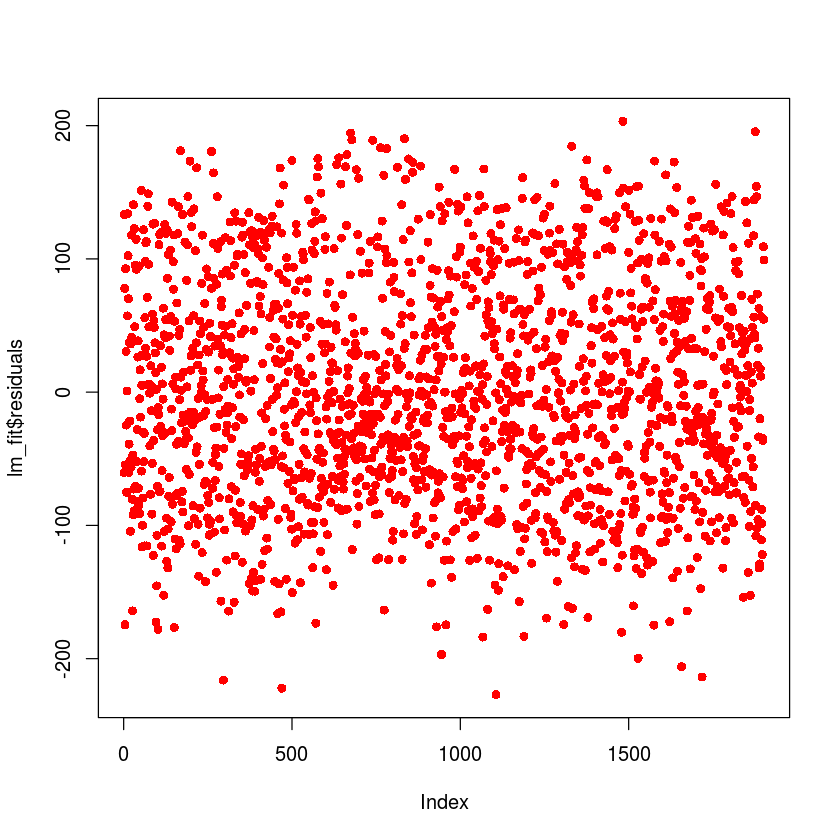

In [197]:
plot(lm_fit$residuals, pch = 16, col = "red")

Para conocer el rendimiento del modelo utilizaremos la métrica _$ R^2$ score_, la cual razona un buen rendimiento con un valor cercano a 1 y un mal rendimiento con un valor cercano a 0. En este caso, nos enfocaremos en el valor _$ R^2$ score ajustado_, el cual funciona mejor con modelos con múltiples variables características, como el nuestro.

La mejor regresion lineal posible:
https://stackoverflow.com/questions/33740012/command-for-finding-the-best-linear-model-in-r

In [199]:
# Stepwise Regression
if(!require(MASS)){
    install.packages("MASS")
    library(MASS)
}
step <- stepAIC(lm_fit, direction="both")
step$anova # display results 

Start:  AIC=16988.51
price ~ host_is_superhost_f + host_is_superhost_t + neighbourhood_cleansed + 
    property_type_Apartment + property_type_Bed...Breakfast + 
    property_type_Boat + property_type_Bungalow + property_type_Cabin + 
    property_type_Camper.RV + property_type_Chalet + property_type_Condominium + 
    property_type_Dorm + property_type_House + property_type_Loft + 
    property_type_Other + property_type_Tent + property_type_Townhouse + 
    property_type_Treehouse + property_type_Yurt + room_type_Entire.home.apt + 
    room_type_Private.room + room_type_Shared.room + accommodates + 
    bathrooms + bedrooms + beds + bed_type_Airbed + bed_type_Couch + 
    bed_type_Futon + bed_type_Pull.out.Sofa + bed_type_Real.Bed + 
    amenities + cleaning_fee + number_of_reviews + review_scores_rating + 
    review_scores_cleanliness + review_scores_checkin + review_scores_communication + 
    review_scores_location + review_scores_value + reviews_per_month + 
    num_cultural_spa


Step:  AIC=16965.26
price ~ host_is_superhost_f + property_type_Apartment + property_type_Bed...Breakfast + 
    property_type_Boat + property_type_Bungalow + property_type_Cabin + 
    property_type_Camper.RV + property_type_Chalet + property_type_Condominium + 
    property_type_Dorm + property_type_House + property_type_Loft + 
    property_type_Other + property_type_Townhouse + room_type_Entire.home.apt + 
    room_type_Private.room + accommodates + bathrooms + bedrooms + 
    beds + bed_type_Airbed + bed_type_Couch + bed_type_Futon + 
    bed_type_Pull.out.Sofa + amenities + cleaning_fee + number_of_reviews + 
    review_scores_rating + review_scores_cleanliness + review_scores_checkin + 
    review_scores_communication + review_scores_location + review_scores_value + 
    reviews_per_month + num_cultural_spaces_lt4km + bookings_per_month

                                Df Sum of Sq      RSS   AIC
- bed_type_Futon                 1        21 13680117 16963
- bed_type_Pull.out.So


Step:  AIC=16959.32
price ~ host_is_superhost_f + property_type_Apartment + property_type_Bed...Breakfast + 
    property_type_Boat + property_type_Bungalow + property_type_Cabin + 
    property_type_Camper.RV + property_type_Chalet + property_type_Condominium + 
    property_type_Dorm + property_type_House + property_type_Loft + 
    property_type_Other + property_type_Townhouse + room_type_Entire.home.apt + 
    room_type_Private.room + accommodates + bathrooms + bedrooms + 
    bed_type_Airbed + bed_type_Couch + amenities + cleaning_fee + 
    number_of_reviews + review_scores_rating + review_scores_cleanliness + 
    review_scores_checkin + review_scores_communication + review_scores_location + 
    review_scores_value + reviews_per_month + num_cultural_spaces_lt4km + 
    bookings_per_month

                                Df Sum of Sq      RSS   AIC
- review_scores_cleanliness      1       470 13680979 16957
- bed_type_Couch                 1       724 13681234 16957
- room_type


Step:  AIC=16953.67
price ~ host_is_superhost_f + property_type_Apartment + property_type_Bed...Breakfast + 
    property_type_Boat + property_type_Bungalow + property_type_Cabin + 
    property_type_Camper.RV + property_type_Chalet + property_type_Condominium + 
    property_type_Dorm + property_type_House + property_type_Loft + 
    property_type_Other + property_type_Townhouse + room_type_Entire.home.apt + 
    accommodates + bathrooms + bedrooms + bed_type_Airbed + amenities + 
    cleaning_fee + number_of_reviews + review_scores_rating + 
    review_scores_checkin + review_scores_communication + review_scores_location + 
    review_scores_value + reviews_per_month + num_cultural_spaces_lt4km + 
    bookings_per_month

                                Df Sum of Sq      RSS   AIC
- bed_type_Airbed                1      1670 13684702 16952
- property_type_Chalet           1      2303 13685335 16952
- bookings_per_month             1      3300 13686332 16952
- review_scores_communicat


Step:  AIC=16948.68
price ~ host_is_superhost_f + property_type_Apartment + property_type_Bed...Breakfast + 
    property_type_Boat + property_type_Bungalow + property_type_Cabin + 
    property_type_Camper.RV + property_type_Condominium + property_type_Dorm + 
    property_type_House + property_type_Loft + property_type_Other + 
    property_type_Townhouse + room_type_Entire.home.apt + accommodates + 
    bathrooms + bedrooms + amenities + cleaning_fee + number_of_reviews + 
    review_scores_rating + review_scores_checkin + review_scores_communication + 
    review_scores_location + review_scores_value + reviews_per_month + 
    num_cultural_spaces_lt4km

                                Df Sum of Sq      RSS   AIC
- review_scores_communication    1      3823 13694070 16947
- review_scores_location         1      5589 13695836 16948
- num_cultural_spaces_lt4km      1      6156 13696403 16948
- review_scores_checkin          1      7152 13697399 16948
- review_scores_rating           


Step:  AIC=16944.47
price ~ host_is_superhost_f + property_type_Apartment + property_type_Bed...Breakfast + 
    property_type_Boat + property_type_Bungalow + property_type_Cabin + 
    property_type_Camper.RV + property_type_Condominium + property_type_Dorm + 
    property_type_House + property_type_Loft + property_type_Other + 
    property_type_Townhouse + room_type_Entire.home.apt + accommodates + 
    bathrooms + bedrooms + amenities + cleaning_fee + number_of_reviews + 
    review_scores_rating + review_scores_location + review_scores_value + 
    reviews_per_month

                                Df Sum of Sq      RSS   AIC
- review_scores_location         1      5643 13708839 16943
- review_scores_rating           1      6729 13709925 16943
- property_type_Dorm             1      9201 13712396 16944
- review_scores_value            1     11675 13714871 16944
<none>                                       13703196 16944
- property_type_Other            1     16699 13719895 16945



Step:  AIC=16941.69
price ~ host_is_superhost_f + property_type_Apartment + property_type_Bed...Breakfast + 
    property_type_Boat + property_type_Bungalow + property_type_Cabin + 
    property_type_Camper.RV + property_type_House + property_type_Loft + 
    property_type_Other + property_type_Townhouse + room_type_Entire.home.apt + 
    accommodates + bathrooms + bedrooms + amenities + cleaning_fee + 
    number_of_reviews + review_scores_rating + review_scores_value + 
    reviews_per_month

                                Df Sum of Sq      RSS   AIC
- property_type_Apartment        1       751 13727163 16940
- property_type_Loft             1       805 13727217 16940
- property_type_Other            1       965 13727377 16940
- property_type_Bed...Breakfast  1      1520 13727932 16940
- property_type_Townhouse        1      6424 13732836 16941
- review_scores_value            1      9180 13735592 16941
- review_scores_rating           1      9562 13735974 16941
+ property_type_Yur


Step:  AIC=16935.9
price ~ host_is_superhost_f + property_type_Bed...Breakfast + 
    property_type_Boat + property_type_Bungalow + property_type_Cabin + 
    property_type_Camper.RV + property_type_House + property_type_Townhouse + 
    room_type_Entire.home.apt + accommodates + bathrooms + bedrooms + 
    amenities + cleaning_fee + number_of_reviews + review_scores_rating + 
    review_scores_value + reviews_per_month

                                Df Sum of Sq      RSS   AIC
- property_type_Bed...Breakfast  1       853 13728751 16934
- property_type_Townhouse        1      6541 13734439 16935
- review_scores_value            1      9134 13737032 16935
- review_scores_rating           1      9432 13737330 16935
+ property_type_Yurt             1     15763 13712135 16936
<none>                                       13727898 16936
- property_type_Camper.RV        1     14715 13742613 16936
- accommodates                   1     15971 13743869 16936
- property_type_Cabin            1


Step:  AIC=16932.13
price ~ host_is_superhost_f + property_type_Boat + property_type_Bungalow + 
    property_type_Cabin + property_type_Camper.RV + property_type_House + 
    room_type_Entire.home.apt + accommodates + bathrooms + bedrooms + 
    amenities + cleaning_fee + number_of_reviews + review_scores_value + 
    reviews_per_month

                                Df Sum of Sq      RSS   AIC
- review_scores_value            1      1858 13745880 16930
+ property_type_Yurt             1     16034 13727988 16932
- property_type_Camper.RV        1     13900 13757923 16932
<none>                                       13744022 16932
- accommodates                   1     16287 13760309 16932
- property_type_Cabin            1     18626 13762648 16933
+ review_scores_location         1      9898 13734124 16933
+ review_scores_rating           1      8968 13735055 16933
- property_type_Bungalow         1     21236 13765259 16933
+ property_type_Townhouse        1      5949 13738073 16933


Step:  AIC=16930.09
price ~ host_is_superhost_f + property_type_Boat + property_type_Bungalow + 
    property_type_Cabin + property_type_House + room_type_Entire.home.apt + 
    accommodates + bathrooms + bedrooms + amenities + cleaning_fee + 
    number_of_reviews + reviews_per_month + property_type_Yurt

                                Df Sum of Sq      RSS   AIC
<none>                                       13743730 16930
+ property_type_Camper.RV        1     13782 13729949 16930
- property_type_Yurt             1     16026 13759756 16930
- accommodates                   1     17790 13761520 16931
- property_type_Cabin            1     17832 13761562 16931
- property_type_Bungalow         1     21319 13765049 16931
+ review_scores_location         1      6463 13737267 16931
+ num_cultural_spaces_lt4km      1      6077 13737653 16931
+ property_type_Apartment        1      5894 13737836 16931
+ property_type_Townhouse        1      5863 13737868 16931
+ bookings_per_month           

Step,Df,Deviance,Resid. Df,Resid. Dev,AIC
,NA,NA,1781,12677597,16988.51
- bed_type_Real.Bed,0,0.000000e+00,1781,12677597,16988.51
- room_type_Shared.room,0,0.000000e+00,1781,12677597,16988.51
- property_type_Yurt,0,0.000000e+00,1781,12677597,16988.51
- property_type_Treehouse,0,0.000000e+00,1781,12677597,16988.51
- property_type_Tent,0,0.000000e+00,1781,12677597,16988.51
- host_is_superhost_t,0,0.000000e+00,1781,12677597,16988.51
- neighbourhood_cleansed,84,1.002499e+06,1865,13680096,16965.26
- bed_type_Futon,1,2.111502e+01,1866,13680117,16963.27
- bed_type_Pull.out.Sofa,1,2.756846e+01,1867,13680145,16961.27


Clustering https://www.datacamp.com/community/tutorials/k-means-clustering-r

## Fase V. Evaluation. Evaluación. Obtención de resultados.

## Fase VI. Deployment. Despliegue. Puesta en producción

## Conclusiones

## Referencias